<a id='Table_of_Contents'></a>
## Table of Contents:
* (1) [Load and Review Data](#Load_and_Review_Data)
* (2) [Exploratory Data Analysis](#Exploratory_Data_Analysis)
    * (a) [Univariate Analysis](#Univariate_Analysis)
    * (b) [Bivariate Analysis](#Bivariate_Analysis)
    * (c) [Initial Insights](#Initial_Insights)
* (3) [Data Pre-Processing](#Data_Pre-Processing)
* (4) [Model Evaluation Criterion](#Model_Evaluation_Criterion)
* (5) [Logistic Regression Model](#Logistic_Regression_Model) 
    * (a) [Original Data](#Original_Data)
    * (b) [Up Sampled Data](#Up_Sampled_Data)
    * (c) [Down Sampled Data](#Down_Sampled_Data)
    * (d) [Regularization](#Regularization)
    * (e) [Compare LR Models](#Compare_LR_Models)
* (6) [Bagging and Boosting Models](#Bagging_and_Boosting_Models)
    * (a) [Cross Validation Scores](#Cross_Validation_Scores)
* (7) [Grid Search Hyperparameter Tuning](#Grid_Search)
    * (c) [XGBoost](#XGBoostGS)
    * (a) [AdaBoost](#AdaBoostGS)
    * (b) [Gradient Boost](#Gradient_BoostGS)
* (8) [Random Search Hyperparameter Tuning](#Random_Search)
    * (c) [XGBoost](#XGBoostRS)
    * (a) [AdaBoost](#AdaBoostRS)
    * (b) [Gradient Boost](#Gradient_BoostRS)
* (9) [Model Performances after Searches](#Model_Performances)
* (10) [Actionable Insights and Recommendations](#Insights_and_Recommendations)


## Objective:
* Create appropriate classification models that predict if a credit card customer wil churn or not. Then, optimize the models using hyperparameter tuning.
* Use the classification models to recommend areas the bank can improve inorder to minimize loss related to credit card customer churn.

## Dataset:
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card (Amount carried over from previous month)
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months) (Difference bw limit and balance)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio (Balance divided by Credit Limit)

## Domain Info:
Credit card users are an important source of revenue for Thera Bank. A reduction in the number of credit card users may result in significant losses for Thera Bank. What insights can be gained from the dataset to help Thera Bank improve its retention of credit card customers?

## Import Libraries:

In [1]:
import warnings

warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,BaggingClassifier)
from xgboost import XGBClassifier

<a id='Load_and_Review_Data'></a>
# (1) Load and Review Data

In [3]:
credit_df = pd.read_csv('/Users/jordan/DBSA Jupyter Notebooks/Projects/Credit Card Churn Prediction/BankChurners.csv')

**Copy dataframe and look at first and last rows**

In [39]:
df = credit_df.copy()
df.head(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   
6  810347208  Existing Customer            51      M                4   
7  818906208  Existing Customer            32      M                0   
8  710930508  Existing Customer            37      M                3   
9  719661558  Existing Customer            48      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   
5        Graduate        Married     $40K - $60K          Blue   
6         Unknown        Married         $120K +          Gold   
7     High School        Unknown     $60K - $80K        Silver   
8      Uneducated         Single     $60K - $80K          Blue   
9        Graduate         Single    $80K - $120K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   
5              36  ...                       1                      2   
6              46  ...                       1                      3   
7              27  ...                       2                      2   
8              36  ...                       2                      0   
9              36  ...                       3                      3   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   
5        4010.0                 1247           2763.0                 1.376   
6       34516.0                 2264          32252.0                 1.975   
7       29081.0                 1396          27685.0                 2.204   
8       22352.0                 2517          19835.0                 3.355   
9       11656.0                 1677           9979.0                 1.524   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  
5             1088              24                0.846                  0.311  
6             1330              31                0.722                  0.066  
7             1538              36                0.714                  0.048  
8             1350              24                1.182              

In [5]:
df.tail(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10117  712503408  Existing Customer            57      M                2   
10118  713755458  Attrited Customer            50      M                1   
10119  716893683  Attrited Customer            55      F                3   
10120  710841183  Existing Customer            54      M                1   
10121  713899383  Existing Customer            56      F                1   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10117        Graduate        Married    $80K - $120K          Blue   
10118         Unknown        Unknown    $80K - $120K          Blue   
10119      Uneducated         Single         Unknown          Blue   
10120     High School         Single     $60K - $80K          Blue   
10121        Graduate         Single  Less than $40K          Blue   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10117              40  ...                       3                      4   
10118              36  ...                       3                      4   
10119              47  ...                       3                      3   
10120              34  ...                       2                      0   
10121              50  ...                       1                      4   
10122              40  ...                       2                      3   
10123              25  ...                       2                      3   
10124              36  ...                       3                      4   
10125              36  ...                       3                      3   
10126              25  ...                       2                      4   

       Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
10117       17925.0                 1909          16016.0   
10118        9959.0                  952           9007.0   
10119       14657.0                 2517          12140.0   
10120       13940.0                 2109          11831.0   
10121        3688.0                  606           3082.0   
10122        4003.0                 1851           2152.0   
10123        4277.0                 2186           2091.0   
10124        5409.0                    0           5409.0   
10125        5281.0                    0           5281.0   
10126       10388.0                 1961           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10117                 0.712            17498             111   
10118                 0.825            10310              63   
10119                 0.166             6009              53   
10120                 0.660            15577             114   
10121                 0.570            14596             120   
10122                 0.703            15476             117   
10123                 0.804             8764              69   
10124                 0.819            10291              60   
10125                 0.535             8395              62   
10126                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
10117                0.820                  0.106  
10118                1.100                  0.096  
10119  

**Look at random rows**

In [6]:
np.random.seed(1)
df.sample(n=10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
6498  712389108  Existing Customer            43      F                2   
9013  718388733  Existing Customer            38      F                1   
2053  710109633  Existing Customer            39      M                2   
3211  717331758  Existing Customer            44      M                4   
5559  709460883  Attrited Customer            38      F                2   
6106  789105183  Existing Customer            54      M                3   
4150  771342183  Attrited Customer            53      F                3   
2205  708174708  Existing Customer            38      M                4   
4145  718076733  Existing Customer            43      M                1   
5324  821889858  Attrited Customer            50      F                1   

     Education_Level Marital_Status Income_Category Card_Category  \
6498        Graduate        Married  Less than $40K          Blue   
9013         College        Unknown  Less than $40K          Blue   
2053         College        Married     $60K - $80K          Blue   
3211        Graduate        Married         $120K +          Blue   
5559       Doctorate        Married  Less than $40K          Blue   
6106   Post-Graduate         Single    $80K - $120K        Silver   
4150        Graduate         Single     $40K - $60K          Blue   
2205        Graduate        Married     $40K - $60K          Blue   
4145        Graduate         Single     $60K - $80K        Silver   
5324       Doctorate         Single         Unknown          Blue   

      Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
6498              36  ...                       3                      2   
9013              32  ...                       3                      3   
2053              31  ...                       3                      2   
3211              32  ...                       3                      4   
5559              28  ...                       2                      4   
6106              42  ...                       1                      2   
4150              40  ...                       3                      2   
2205              27  ...                       2                      4   
4145              31  ...                       3                      3   
5324              46  ...                       4                      3   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
6498        2570.0                 2107            463.0   
9013        2609.0                 1259           1350.0   
2053        9871.0                 1061           8810.0   
3211       34516.0                 2517          31999.0   
5559        1614.0                    0           1614.0   
6106       34516.0                 2488          32028.0   
4150        1625.0                    0           1625.0   
2205        5535.0                 1276           4259.0   
4145       25824.0                 1170          24654.0   
5324        1970.0                 1477            493.0   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
6498                 0.651             4058              83   
9013                 0.871             8677              96   
2053                 0.545             1683              34   
3211                 0.765             4228              83   
5559                 0.609             2437              46   
6106                 0.552             4401              87   
4150                 0.689             2314              43   
2205                 0.636             1764              38   
4145                 0.684             3101              73   
5324                 0.662             2493              44   

      Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
6498                0.766                  0.820  
9013                0.627                  0.483  
2053                0.478                  0.107  
3211         

**Check the shape of the dataset**

In [40]:
df.shape

(10127, 21)

***
* *There are 10127 Rows and 21 Columns.*
***

**List column names**

In [41]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

**Check data types of columns**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

**Check unique values in columns**

In [10]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

***
* *There are six columns typed as object/category, but it looks like more columns could be recategorized to object/category. Although this will lengthen the tuning process during later steps*
* *CLIENTUM is not needed.*
***

In [42]:
#Create list for later conversion of data types
cat_cols = ['Attrition_Flag','Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

**Drop columns**

In [43]:
df.drop(['CLIENTNUM'],axis=1,inplace=True)
print(f'There are now {df.shape[0]} rows and {df.shape[1]} columns.')
df.head()

There are now 10127 rows and 20 columns.


Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

***
[[Table of Contents](#Table_of_Contents)]
***

**Convert data types**

In [44]:
for column in cat_cols:
    df[column]=df[column].astype("category")

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

**Check for duplicates**

In [46]:
df.duplicated(subset=None, keep= False).value_counts()

False    10127
dtype: int64

***
* *There are no duplicate rows.*
***

**Check missing values**

In [47]:
df.isnull().sum().sort_values(ascending=False)

Avg_Utilization_Ratio       0
Total_Ct_Chng_Q4_Q1         0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Attrition_Flag              0
dtype: int64

***
* *There are no missing values.*
***

**Summary of data**

In [29]:
df.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

***
* *There's a wide age range of customers.*
* *Half of customers have been with the bank for 3 years or less.*
* *No customers have been with the bank for more than 5 years*
* *All customers have been with the bank at least 1 year.*
* *The longest period of credit card inactivity is 6 months.*
* *There's a large range of credit limits and open-to-buy averages.*
* *It looks like most customers decreased their total amount and number of transactions from quarter 1 to quarter 4.*
***

In [48]:
# Print each unique value for categorical variables.
for column in cat_cols:
    print(f'Count of Unique Values for {column}:\n'+'*'*50)
    print(df[column].value_counts())
    print('\n'*2)

Count of Unique Values for Attrition_Flag:
**************************************************
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64



Count of Unique Values for Gender:
**************************************************
F    5358
M    4769
Name: Gender, dtype: int64



Count of Unique Values for Education_Level:
**************************************************
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64



Count of Unique Values for Marital_Status:
**************************************************
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64



Count of Unique Values for Income_Category:
**************************************************
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unkno

***
* *The education level of 1519 customers is unknown.*
* *Since divorced customers represent only 7% of the dataset it may be more beneficial for analysis to mark them as single.*
* *It doesn't look like there are any odd entries for the categorical variables.*
***

In [30]:
df.describe(include=['category']).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

***
* *Most observations are for existing customers.*
* *There seems to be a fairly equal distribution of genders.*
* *The most frequent education level is a graduate degree.*
* *Most customers have a Blue card.*
* *The most common marraige status for customers is married.*
* *The most common income bracket for customers is less than $40,000.*
***

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Exploratory_Data_Analysis'></a>
# (2) EDA

<a id='Univariate_Analysis'></a>
## Univariate Analysis

In [34]:
# This function takes a numerical column as the input and returns boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

In [60]:
#Create list of numerical columns
num_cols = []
for column in df.columns:
    if column not in cat_cols:
        num_cols.append(column)

print(f'Numerical Columns:',num_cols) #Check to make sure the correct column names are listed.
print(f'\nLength of num_cols: '+str(len(num_cols))) 

Numerical Columns: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Length of num_cols: 14


Customer_Age:
**************************************************


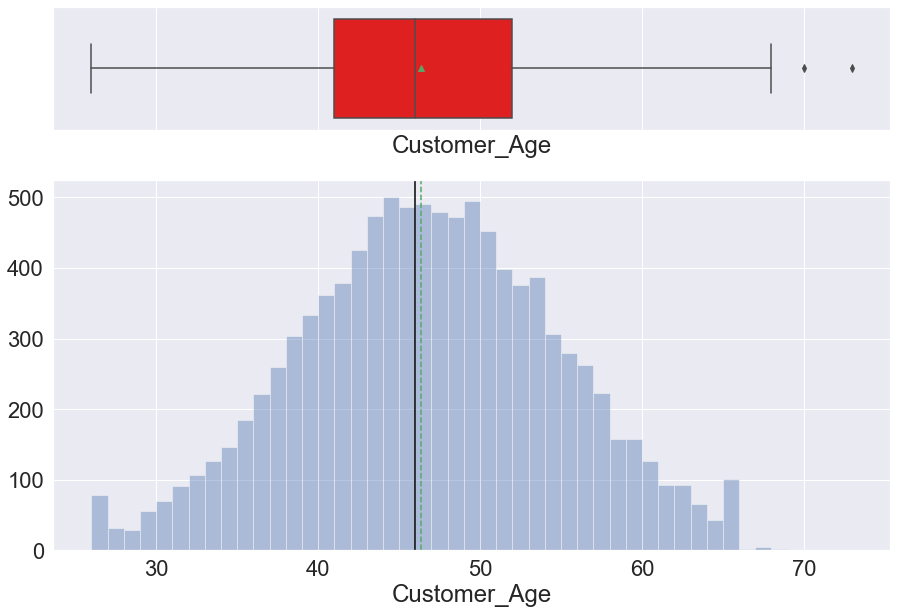




Dependent_count:
**************************************************


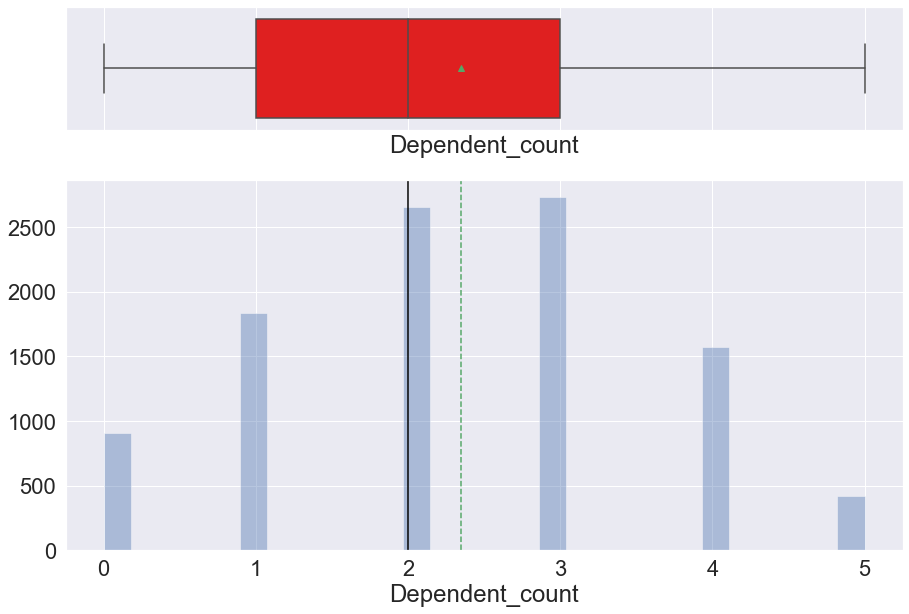




Months_on_book:
**************************************************


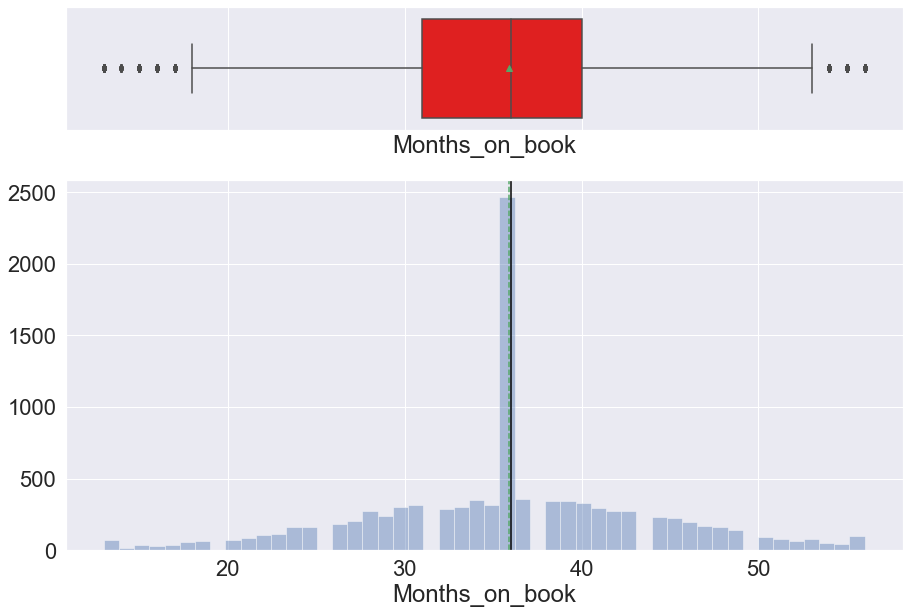




Total_Relationship_Count:
**************************************************


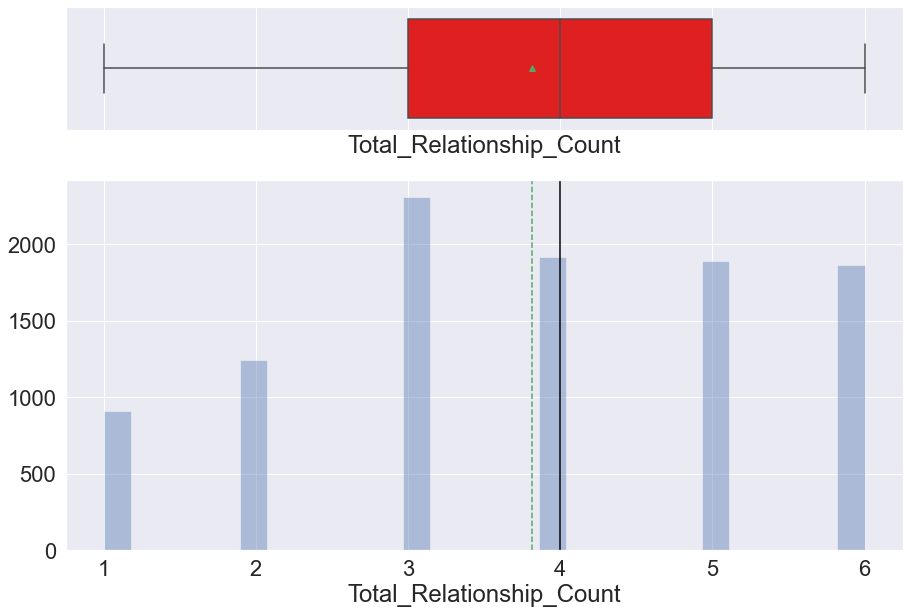




Months_Inactive_12_mon:
**************************************************


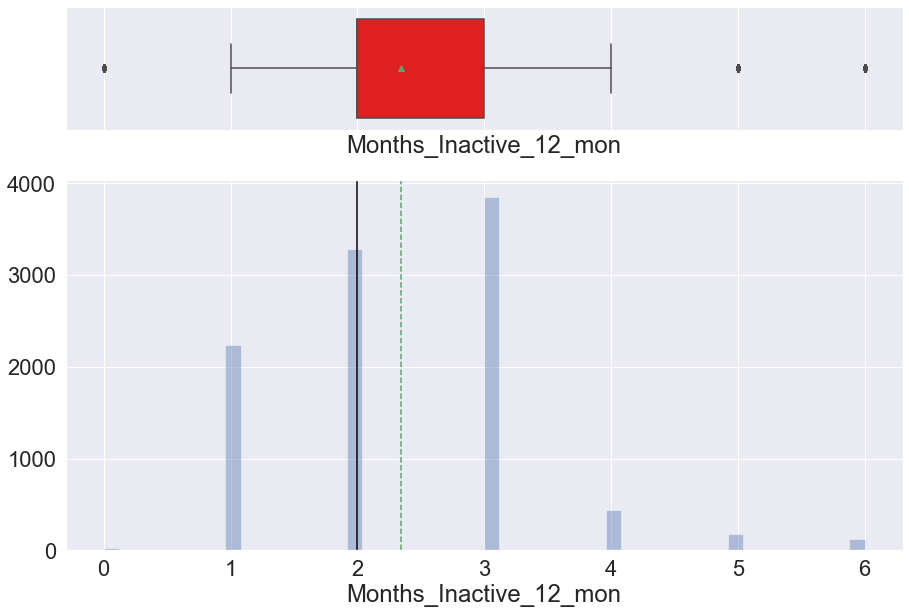




Contacts_Count_12_mon:
**************************************************


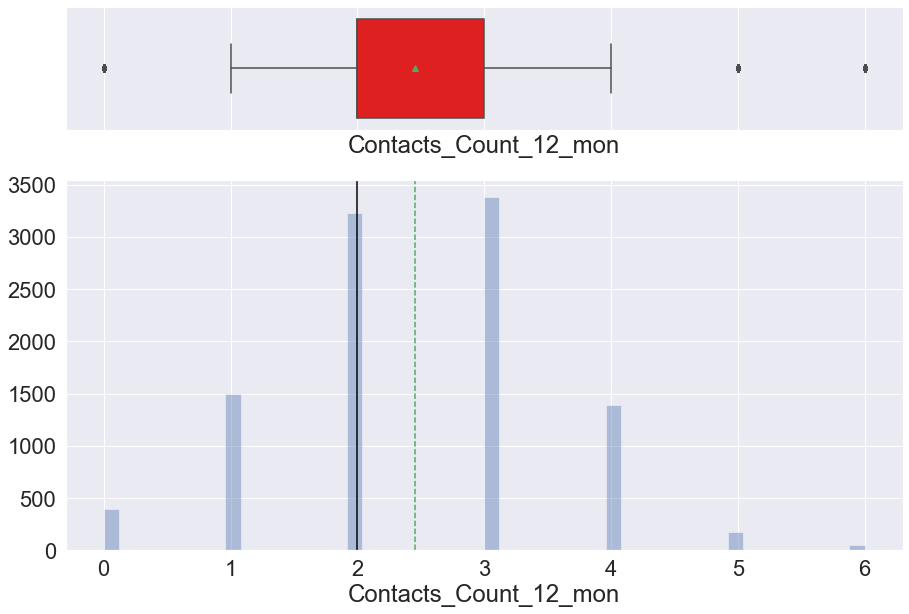




Credit_Limit:
**************************************************


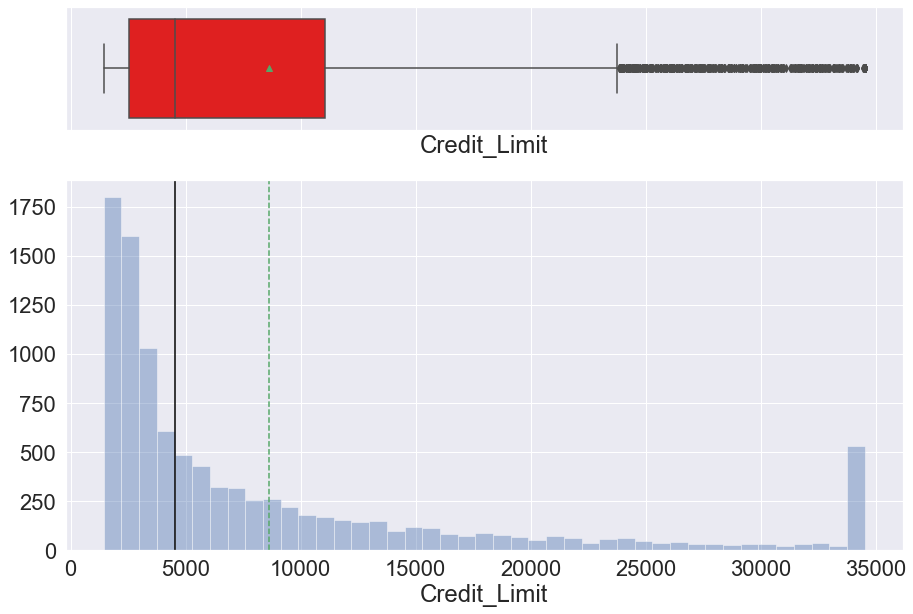




Total_Revolving_Bal:
**************************************************


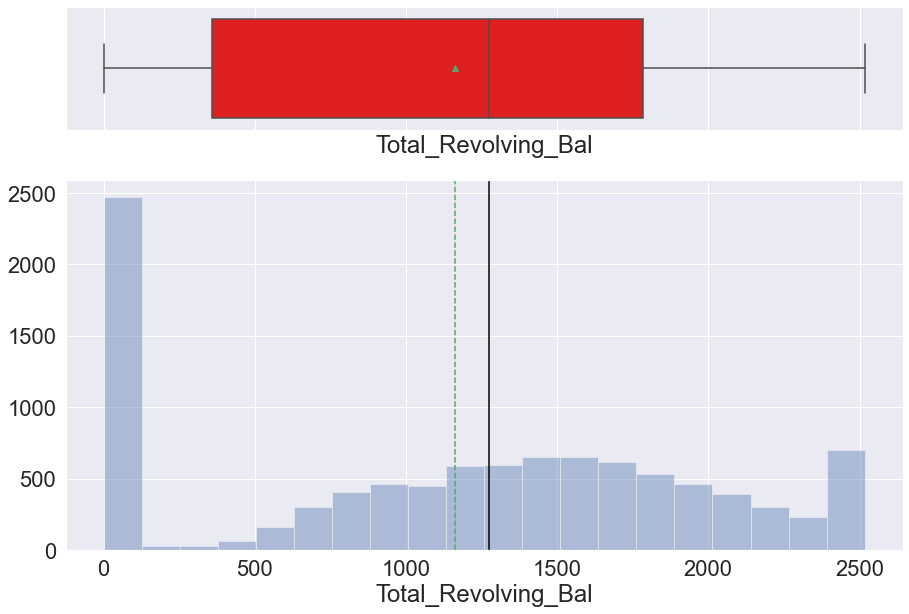




Avg_Open_To_Buy:
**************************************************


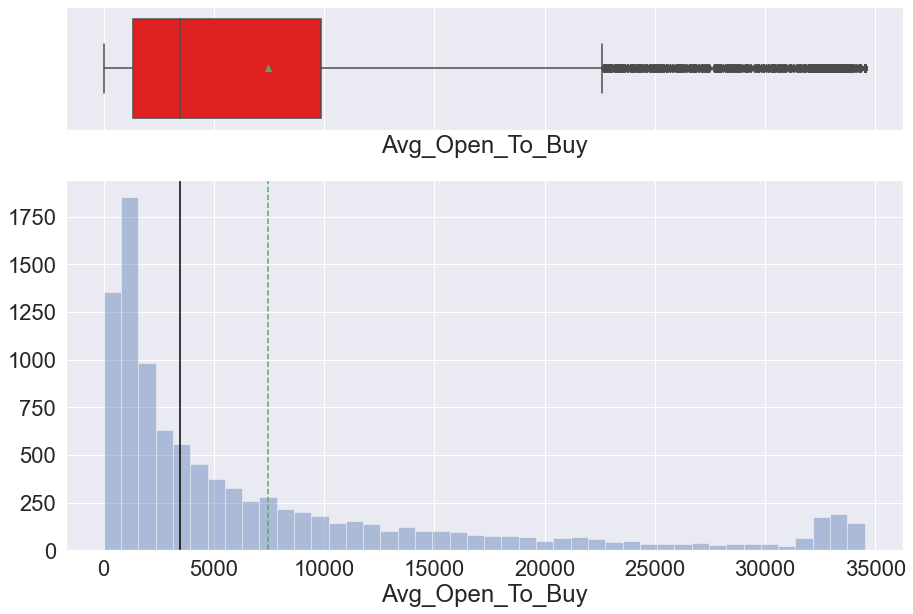




Total_Amt_Chng_Q4_Q1:
**************************************************


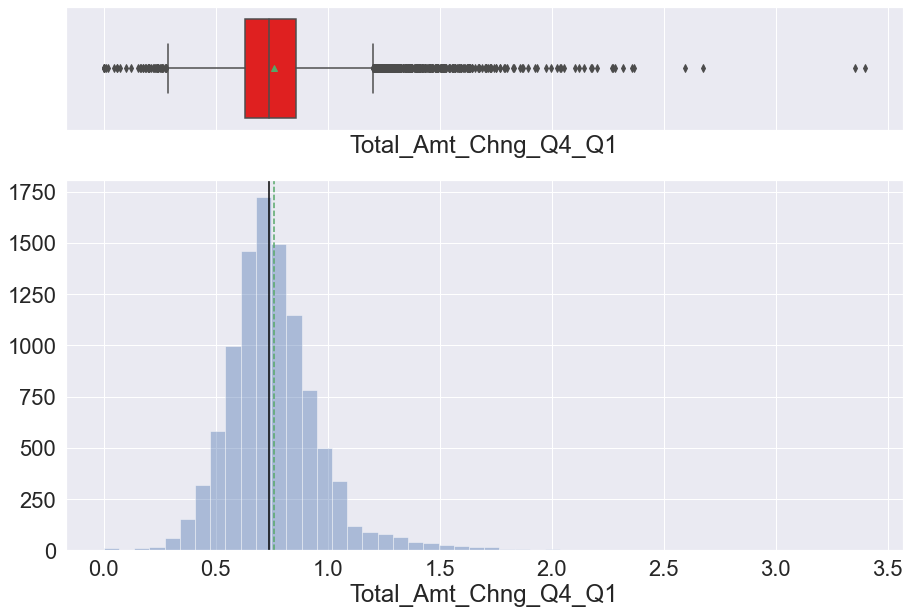




Total_Trans_Amt:
**************************************************


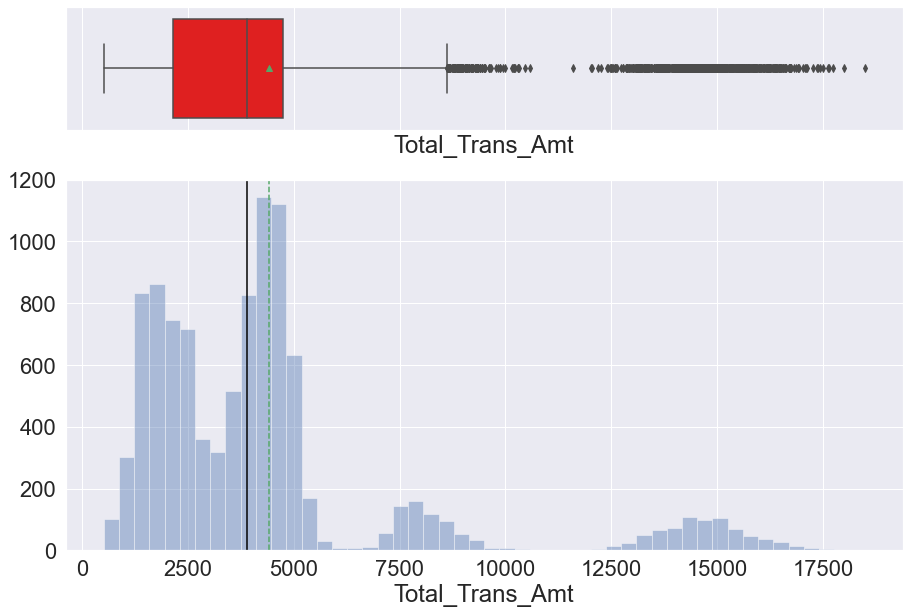




Total_Trans_Ct:
**************************************************


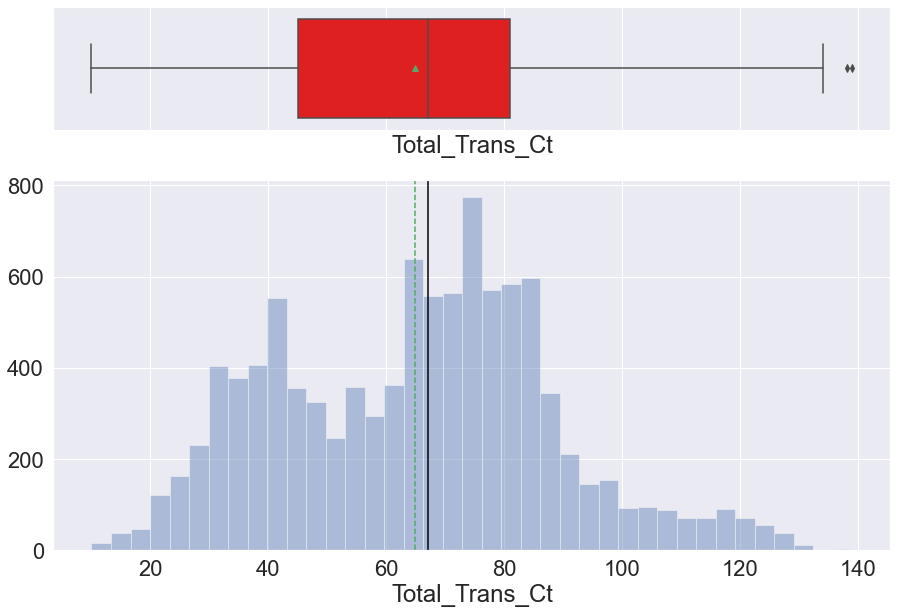




Total_Ct_Chng_Q4_Q1:
**************************************************


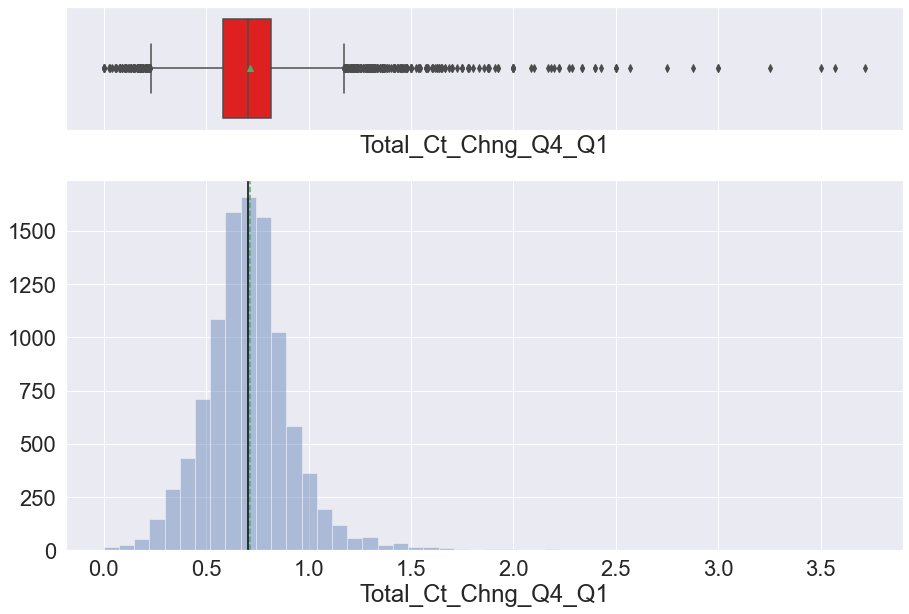




Avg_Utilization_Ratio:
**************************************************


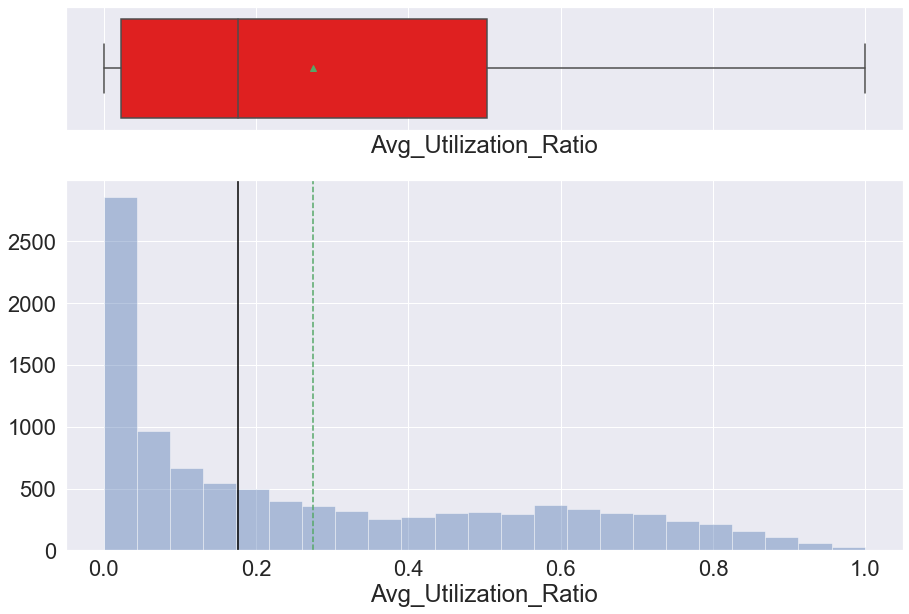

In [58]:
for column in num_cols:
    print(column+':\n'+'*'*50)
    histogram_boxplot(df[column])
    plt.show()
    print('\n'*2)

***
* *It looks like there are two outliers for Age, but those seem plausible.*
* *Age seems to be normally distributed.*
* *Dependent Count seems normally distributed.*
* *The mode and the median of the number of Months on Book appear to be the same, with almost 2500 customers having been with the bank for 36 months.*
* *The number of Months on Book seems normally distributed.*
* *There are about 8 outliers for Months on Book, but they seem reasonable.* 
* *Half of customer have four or less products with the bank.*
* *Not a lot of customers are inactive for more than 3 months at a time.*
* *Credit Limit data is right skewed.*
* *Over 700 customers have the highest credit limit, this may indicate a data entry error.*
* *Almost 2500 customers have a zero revolving balance.*
* *The average open-to-buy value or remaining balance is right skewed.*
* *Customers tend to have a lower remaining balance.*
* *When running logistic regression, it would be best to scale the following columns: Average Open-to-Buy, Credit Limit, Total Amount of Transactions,  
* *Consider dropping or replacing the outliers for Change in Total Amount of Transactions from Q1 to Q4.*
* *Consider dropping or replacing the outliers for Change in Total Count of Transactions.*
* *Consider dropping or replacing the outliers for Change in Total Count of Transactions from Q1 to Q4.*
* *Total Transaction Amount has large gaps between groups of values. Consider binning this column and converting to categorical.*
* *Average Utilization Ratio is right skewed, but there are no outliers.*
***

***
[[Table of Contents](#Table_of_Contents)]
***

In [68]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

Attrition_Flag:
**************************************************


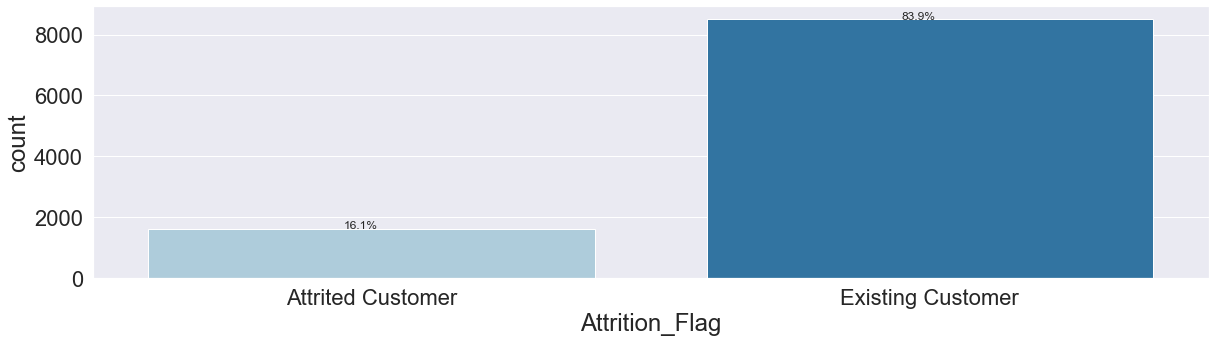




Gender:
**************************************************


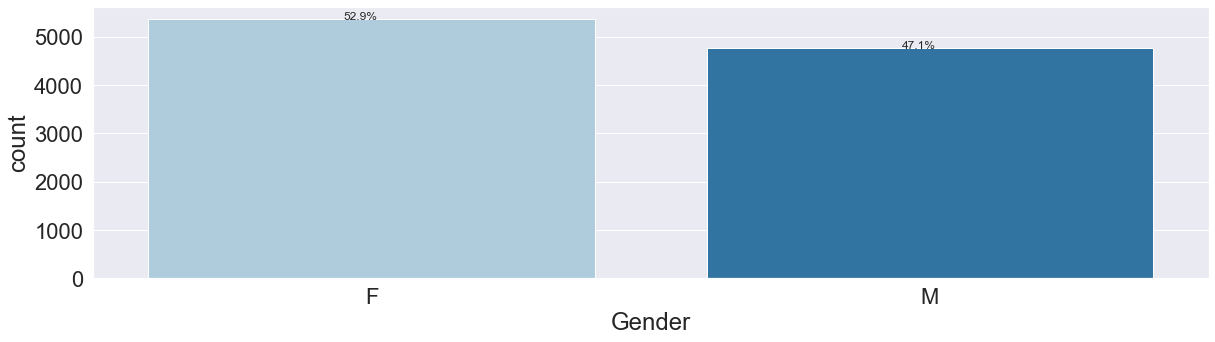




Education_Level:
**************************************************


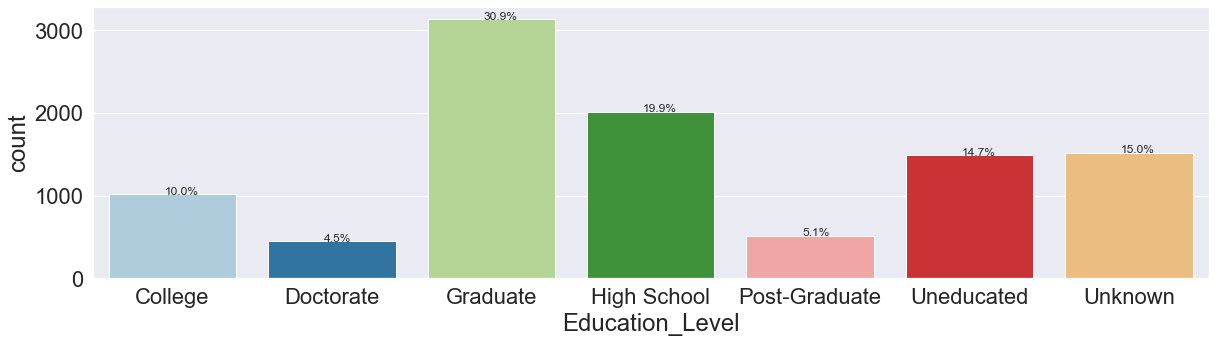




Marital_Status:
**************************************************


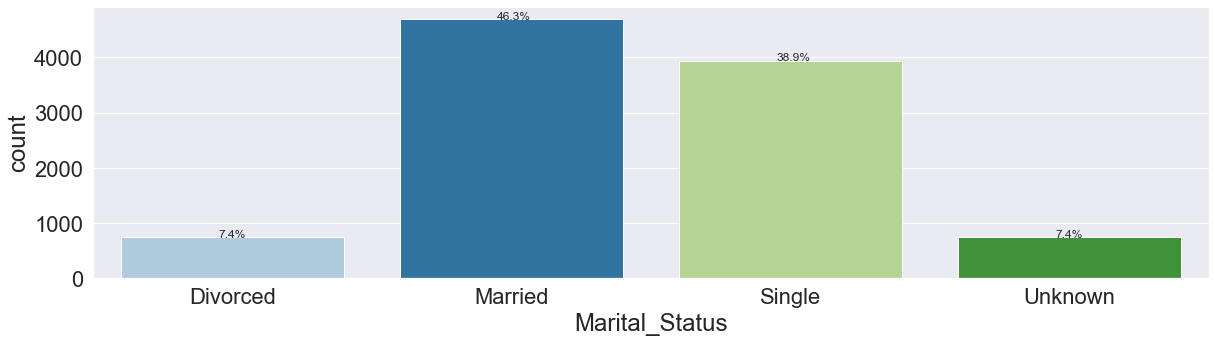




Income_Category:
**************************************************


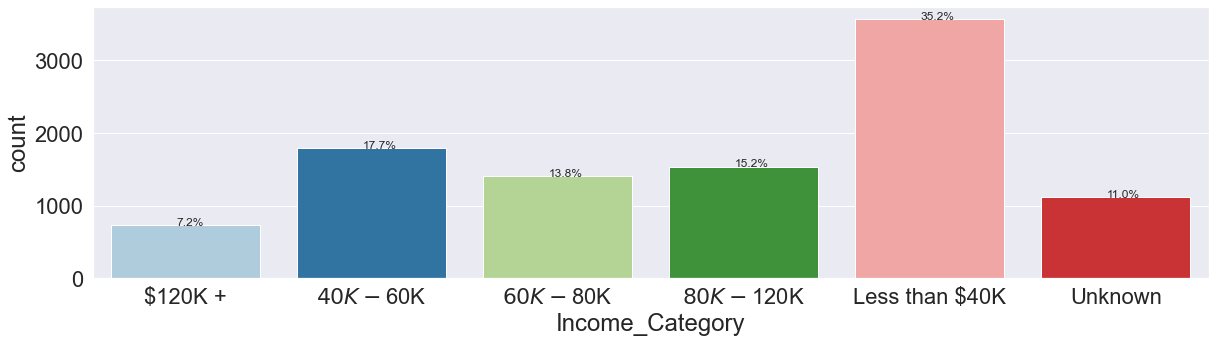




Card_Category:
**************************************************


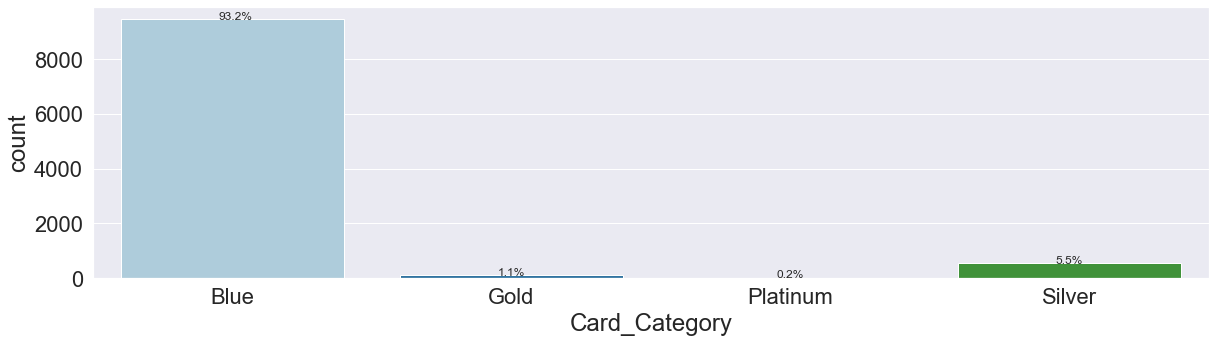

In [74]:
#Print count plot for each categorical column
for column in cat_cols:
    print(column+':\n'+'*'*50)
    plt.figure(figsize=(20,5)) #Size graph output
    ax = sns.countplot(df[column],palette='Paired')
    perc_on_bar(ax,df[column])
    print('\n'*2)

* *16% of customers attrited and 84% are still existing customers.*
* *Gender is fairly evenly split 53% to 47%.*
* *Graduate and high school level educations represent the largest portion of customers.*
* *15% of customers' education levels is unknown.*
* *When including divorced as single, the split between married an single customers seems somewhat even.*
* *The largest chunk of customers earn less than $40,000.* 
* *11% of customers' income is unknown.*
* *93% of customers have the Blue card.*


***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Bivariate_Analysis'></a>
## Bivariate Analysis

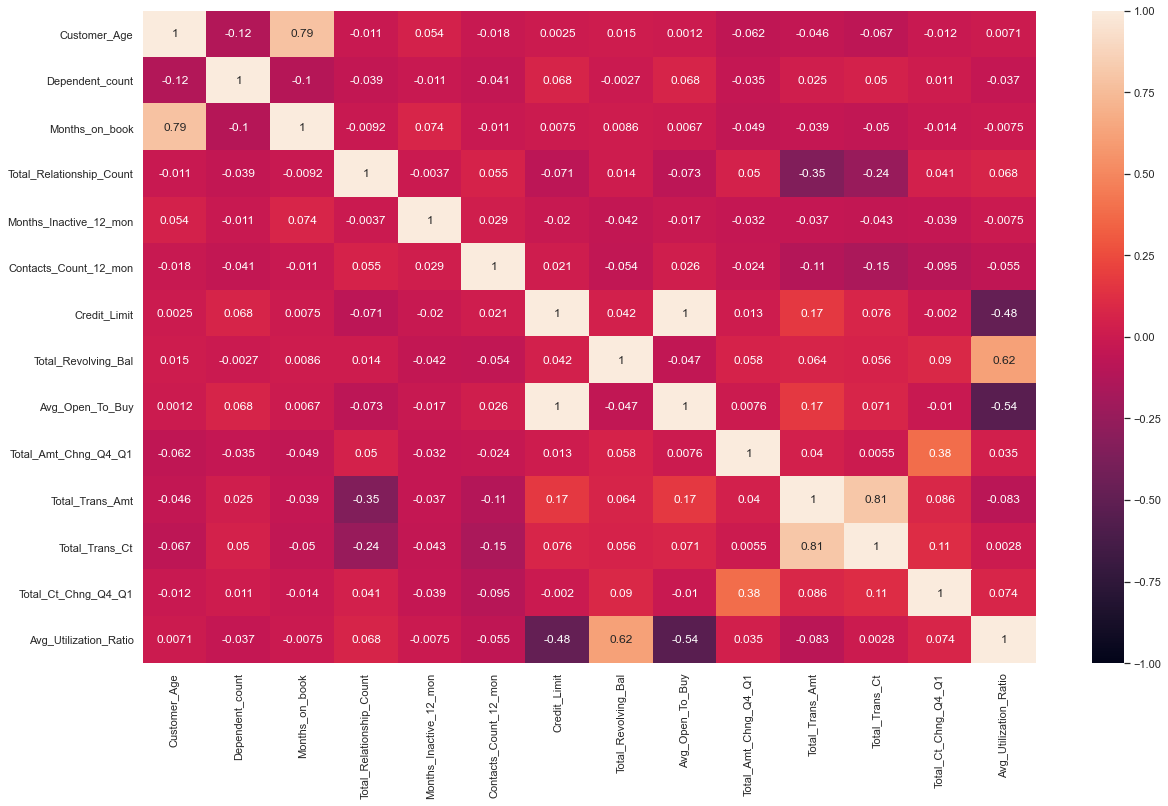

In [90]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,fmt='.2g')
plt.show()

***
* *Considere droping average open-to-buy since it is perfectly correlated with credit limit.*
* *Customer Age is heavily correlated with length number of months on book. May be too highly correlated for regression.*
* *Total transaction count and amount are highly correlated.*
* *Total revolving balance and utilization ratio are also strongly correlated.*
***

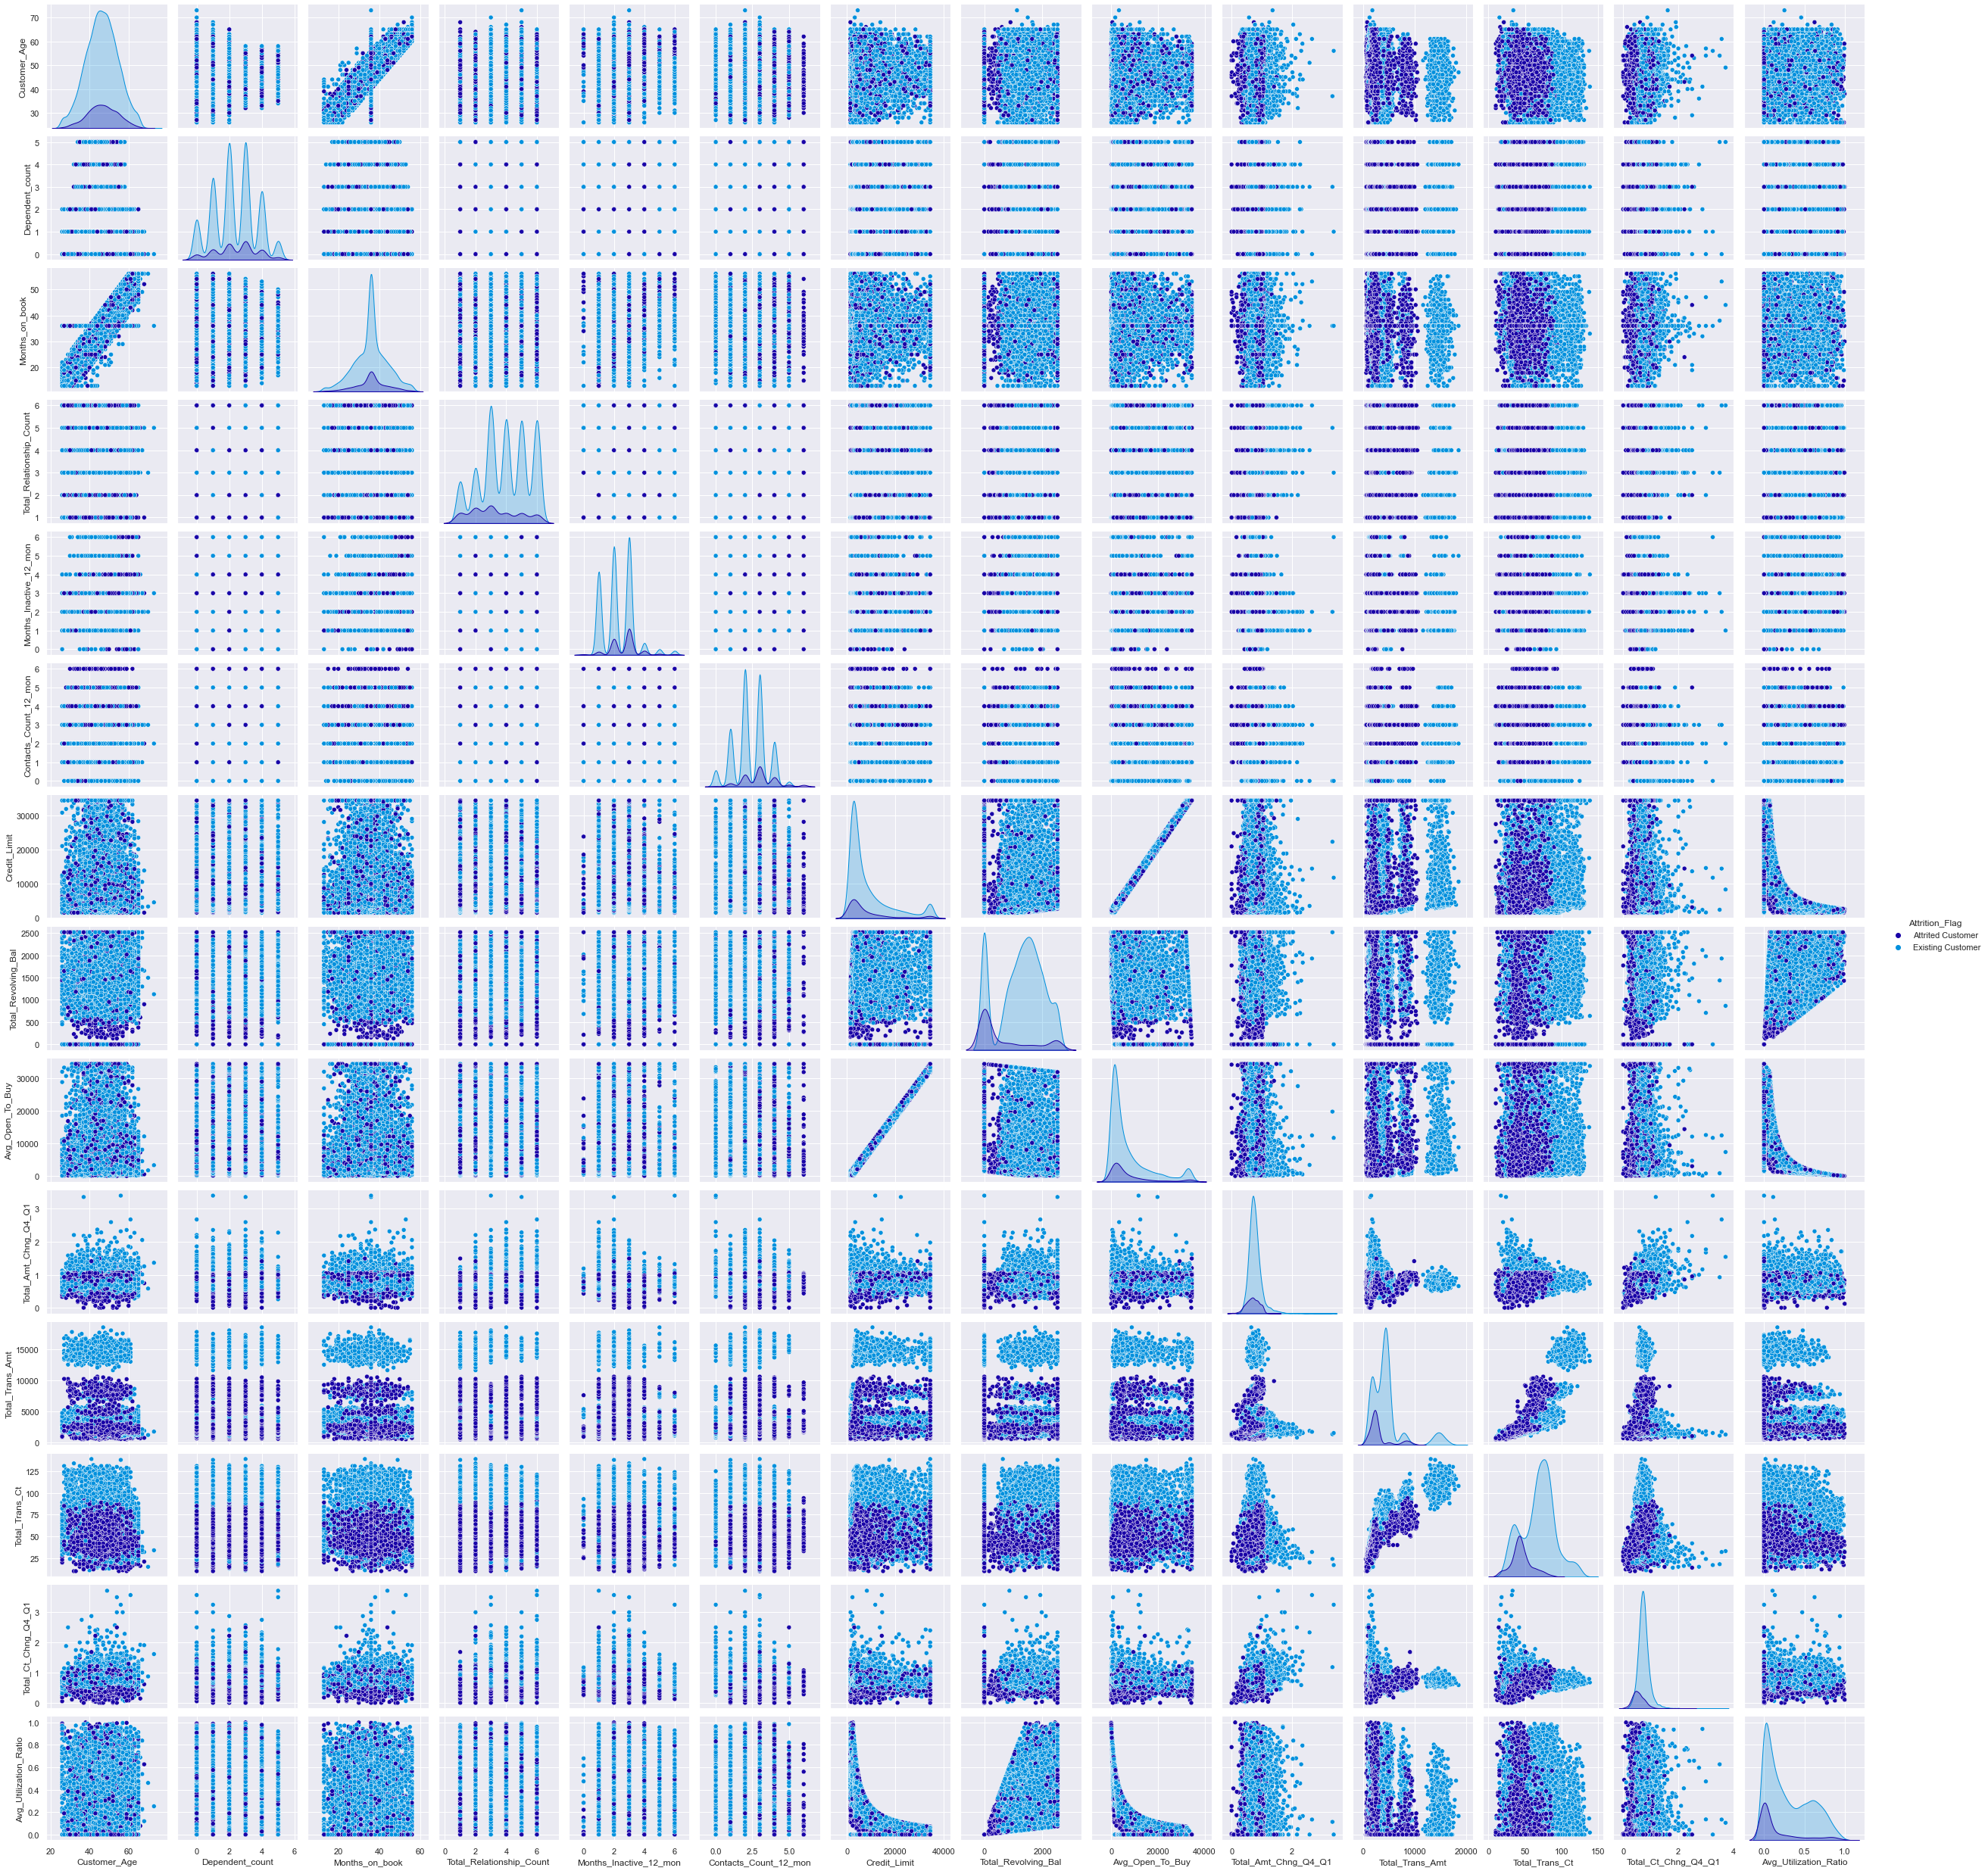

In [91]:
sns.pairplot(df, hue="Attrition_Flag")

In [77]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, df["Attrition_Flag"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, df["Attrition_Flag"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag:
**************************************************
Attrition_Flag     Attrited Customer  Existing Customer    All
Attrition_Flag                                                
Attrited Customer               1627                  0   1627
Existing Customer                  0               8500   8500
All                             1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


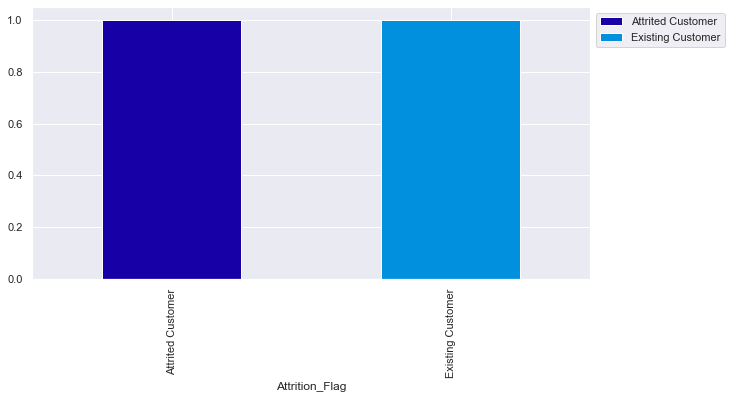




Gender:
**************************************************
Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


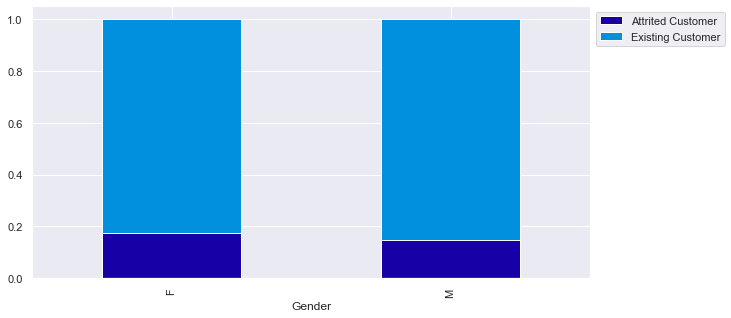




Education_Level:
**************************************************
Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


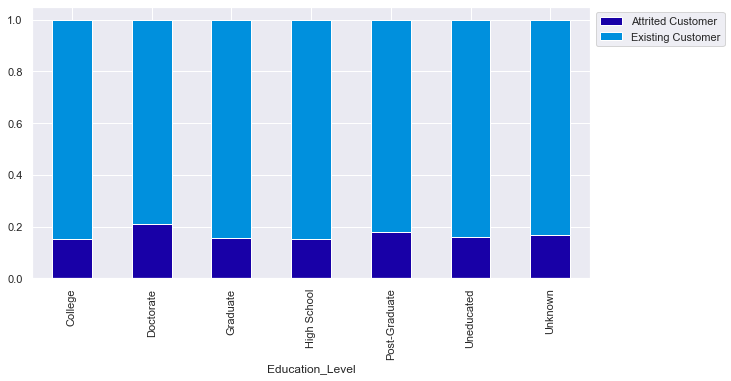




Marital_Status:
**************************************************
Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


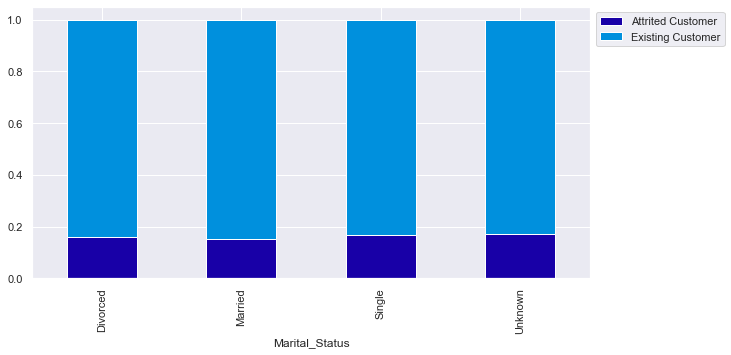




Income_Category:
**************************************************
Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


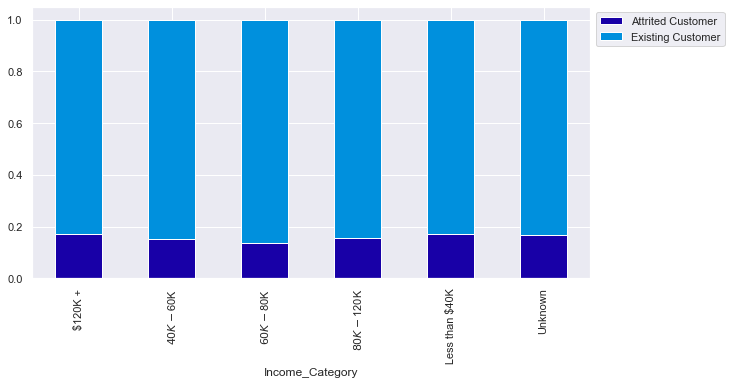




Card_Category:
**************************************************
Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


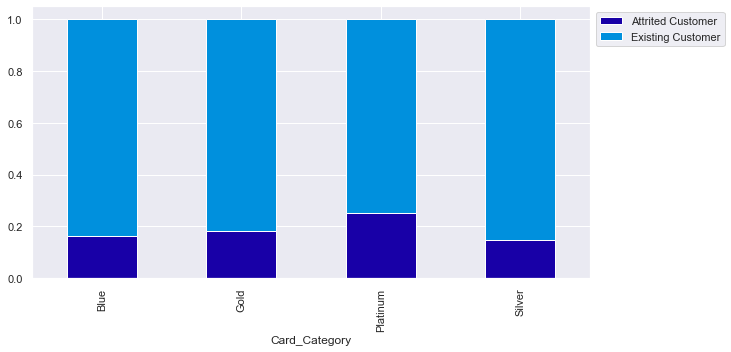

In [78]:
#Print count plot for each categorical column
for column in cat_cols:
    print(column+':\n'+'*'*50)
    stacked_plot(df[column])
    print('\n'*2)

***
* *People with doctorate degrees my have a higher attrition rate.*
* *Those with platinum cards may have a higher attrition rate.*
***

***
[[Table of Contents](#Table_of_Contents)]
***

In [86]:
### Function to plot distributions and Boxplots of enrollees
def plot(x,target='Attrition_Flag'):
    fig,axs = plt.subplots(2,2,figsize=(12,10))
    axs[0, 0].set_title('Distribution of Existing Customers')
    sns.distplot(df[(df[target] == 'Existing Customer')][x],ax=axs[0,0],color='teal')
    axs[0, 1].set_title('Distribution of Attrited Customers')
    sns.distplot(df[(df[target] == 'Attrited Customer')][x],ax=axs[0,1],color='orange')
    axs[1,0].set_title('Boxplot w.r.t Customer Status')
    sns.boxplot(df[target],df[x],ax=axs[1,0],palette='gist_rainbow')
    axs[1,1].set_title('Boxplot w.r.t Customer Status - Without outliers')
    sns.boxplot(df[target],df[x],ax=axs[1,1],showfliers=False,palette='gist_rainbow')
    plt.tight_layout()
    plt.show()

Customer_Age:
**************************************************


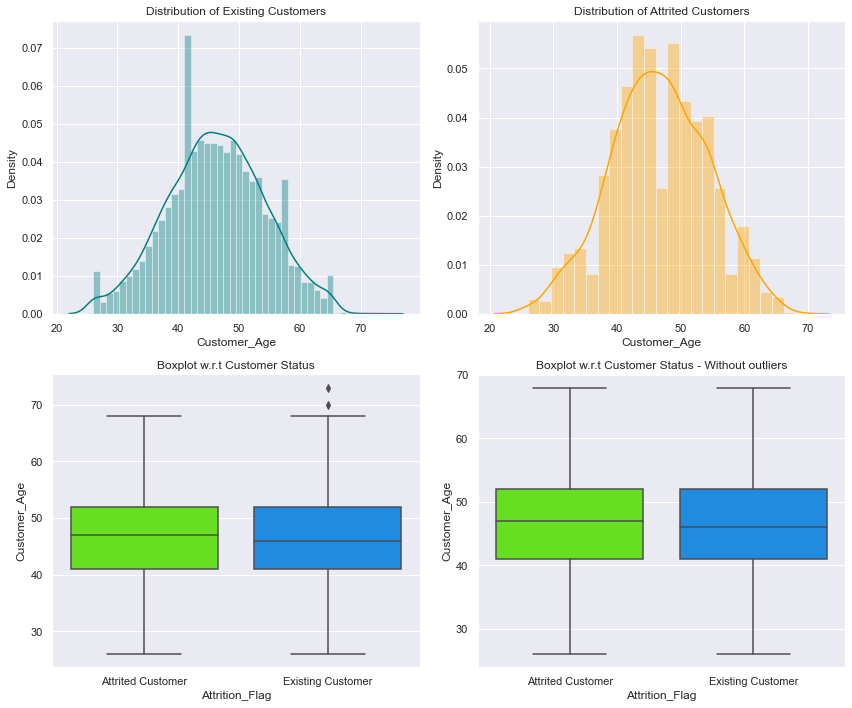




Dependent_count:
**************************************************


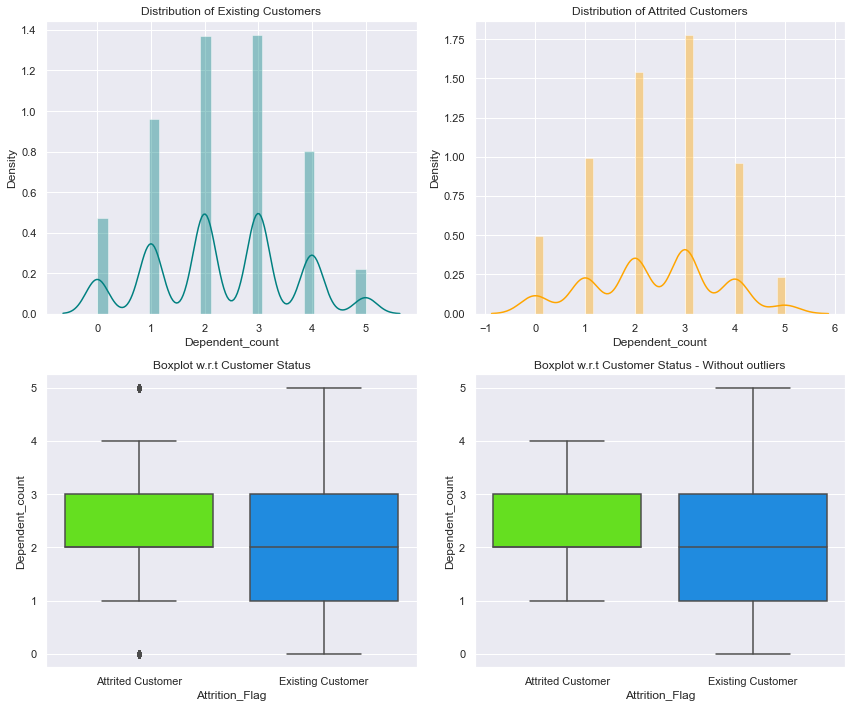




Months_on_book:
**************************************************


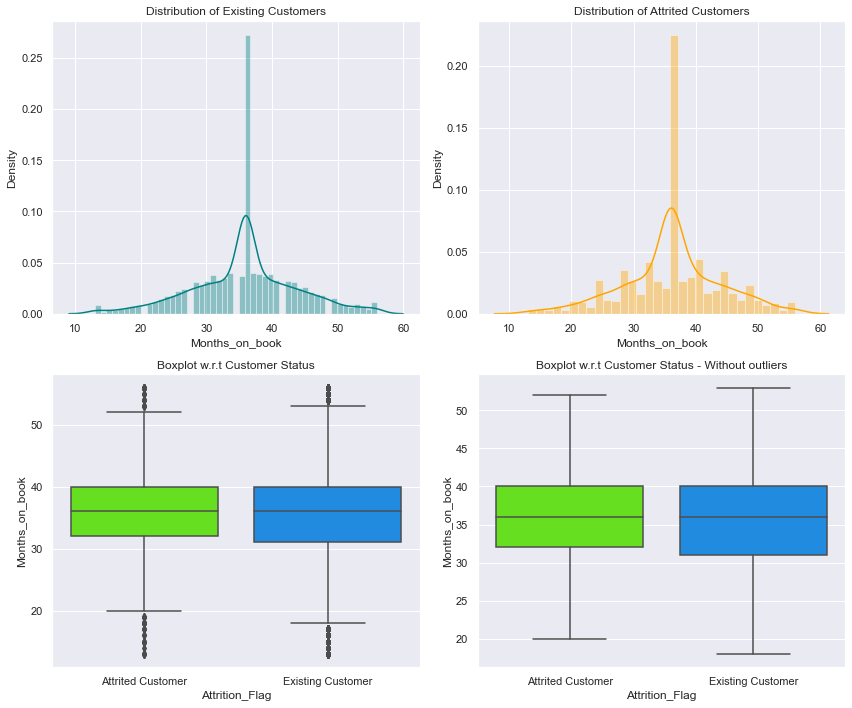




Total_Relationship_Count:
**************************************************


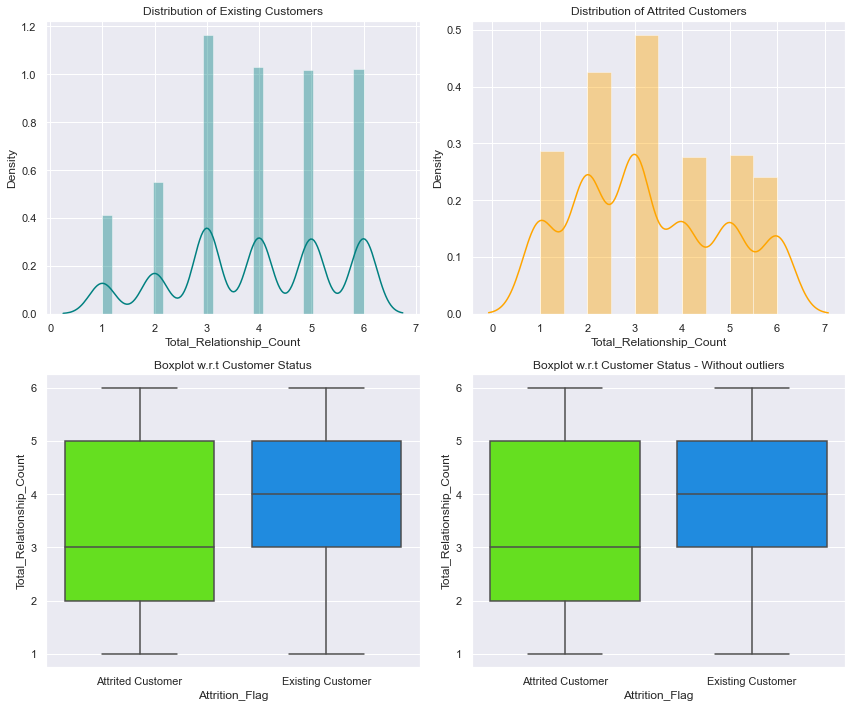




Months_Inactive_12_mon:
**************************************************


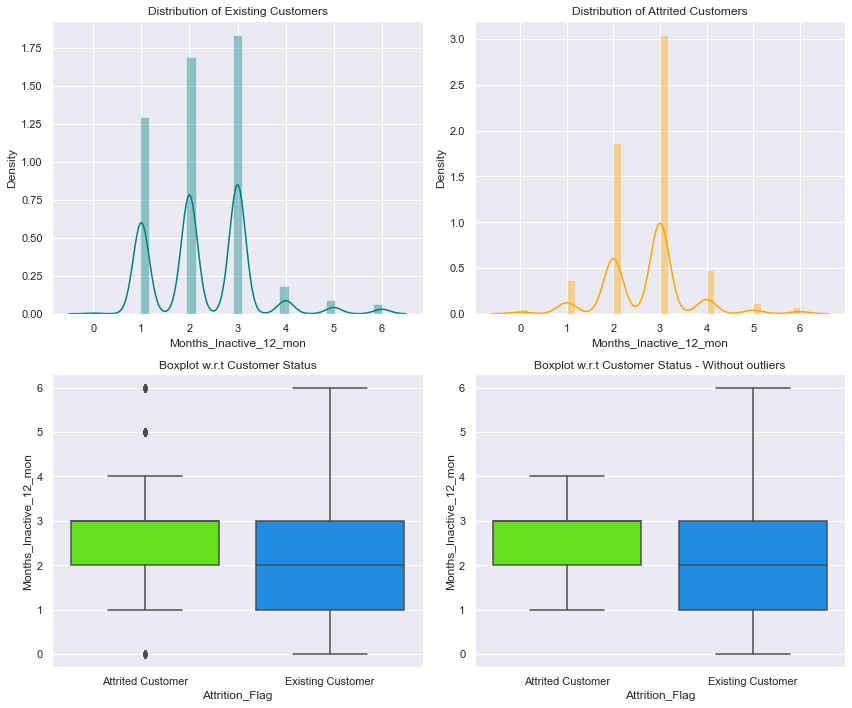




Contacts_Count_12_mon:
**************************************************


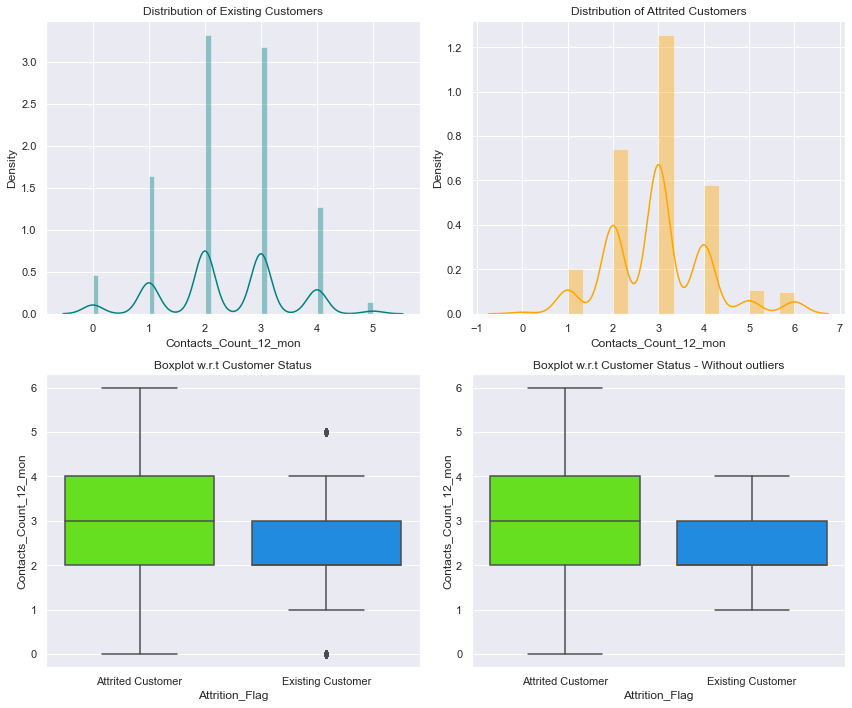




Credit_Limit:
**************************************************


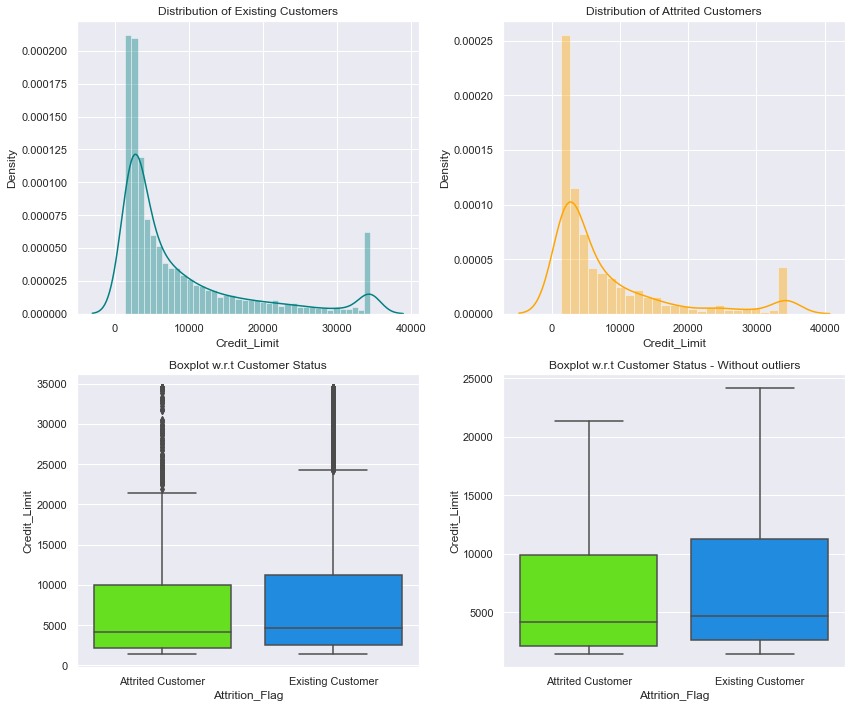




Total_Revolving_Bal:
**************************************************


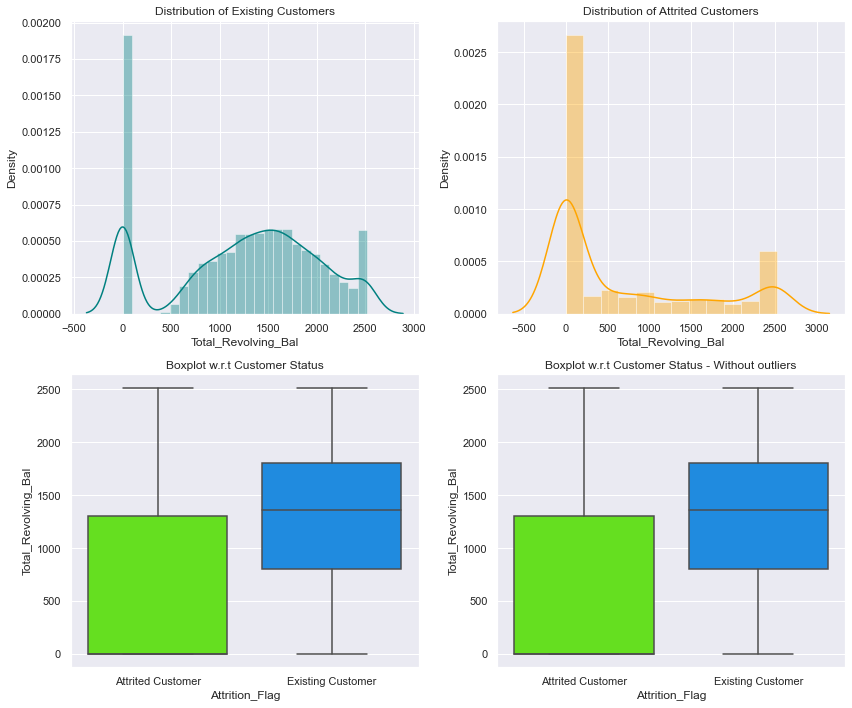




Avg_Open_To_Buy:
**************************************************


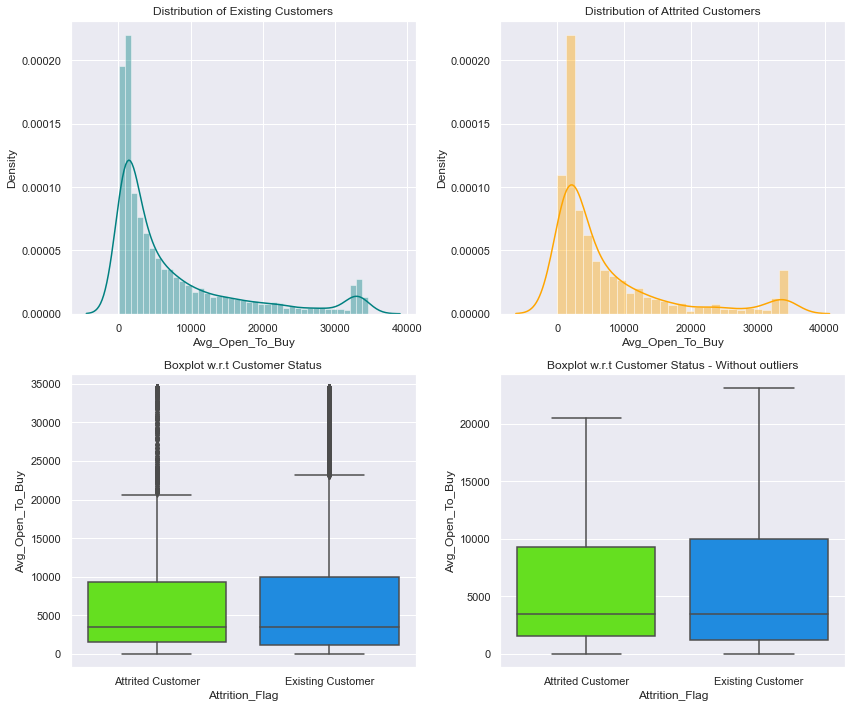




Total_Amt_Chng_Q4_Q1:
**************************************************


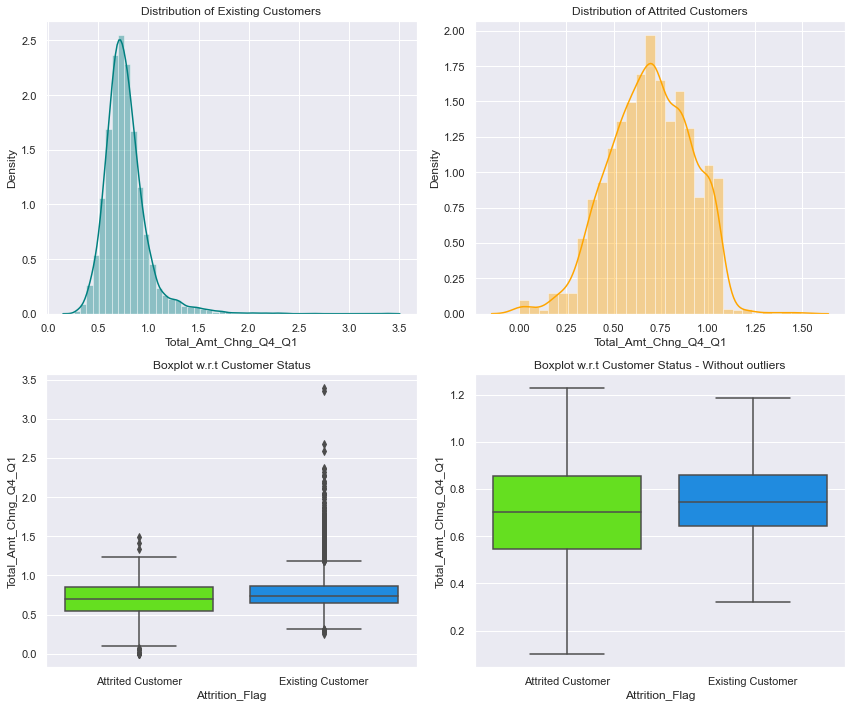




Total_Trans_Amt:
**************************************************


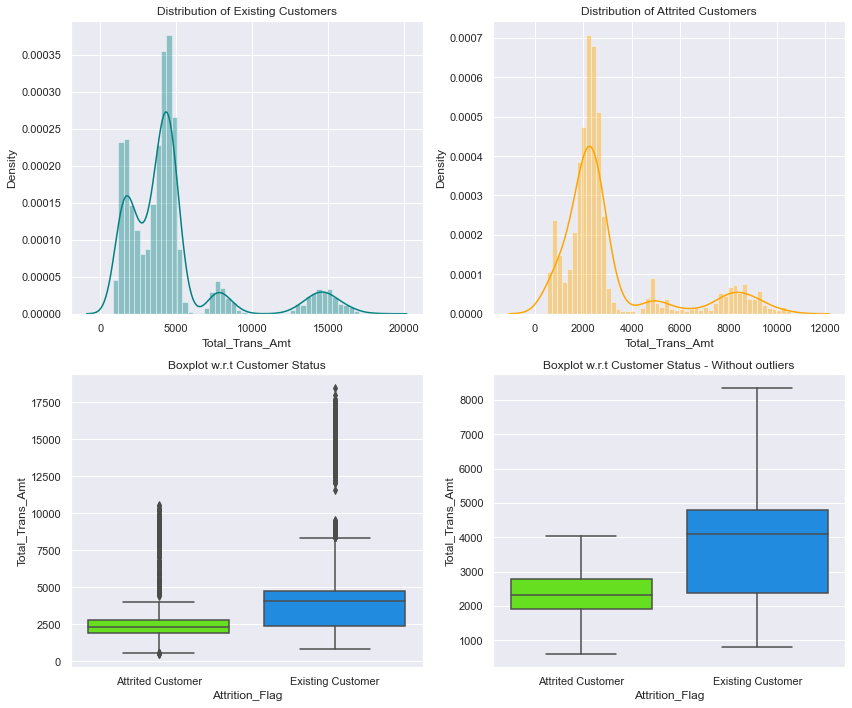




Total_Trans_Ct:
**************************************************


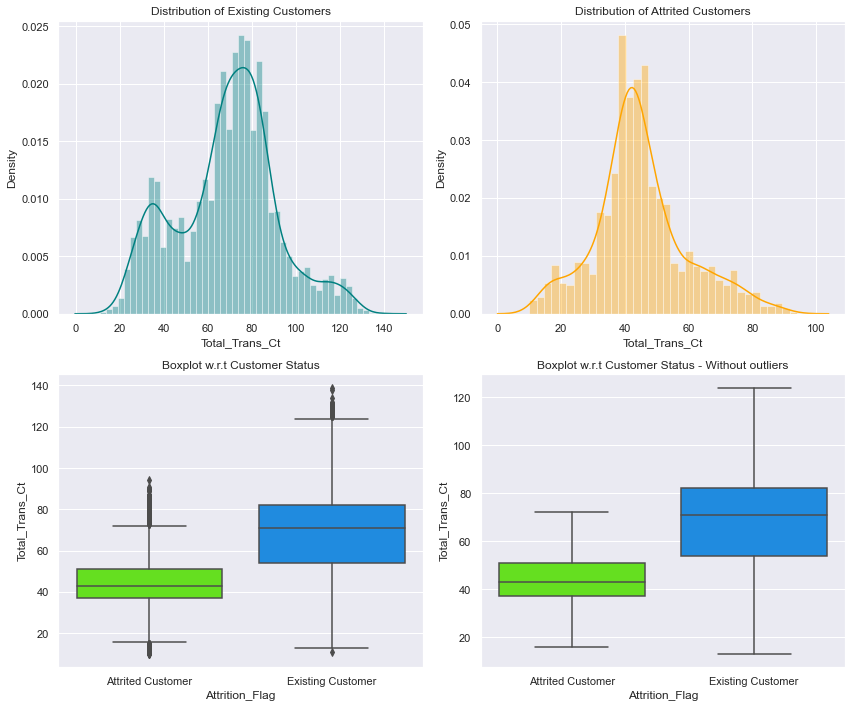




Total_Ct_Chng_Q4_Q1:
**************************************************


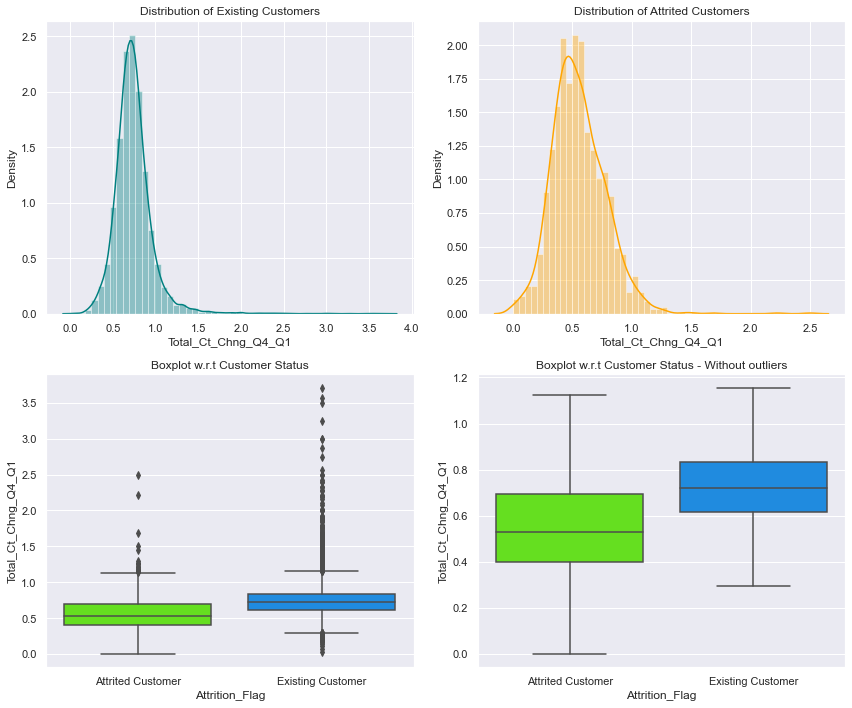




Avg_Utilization_Ratio:
**************************************************


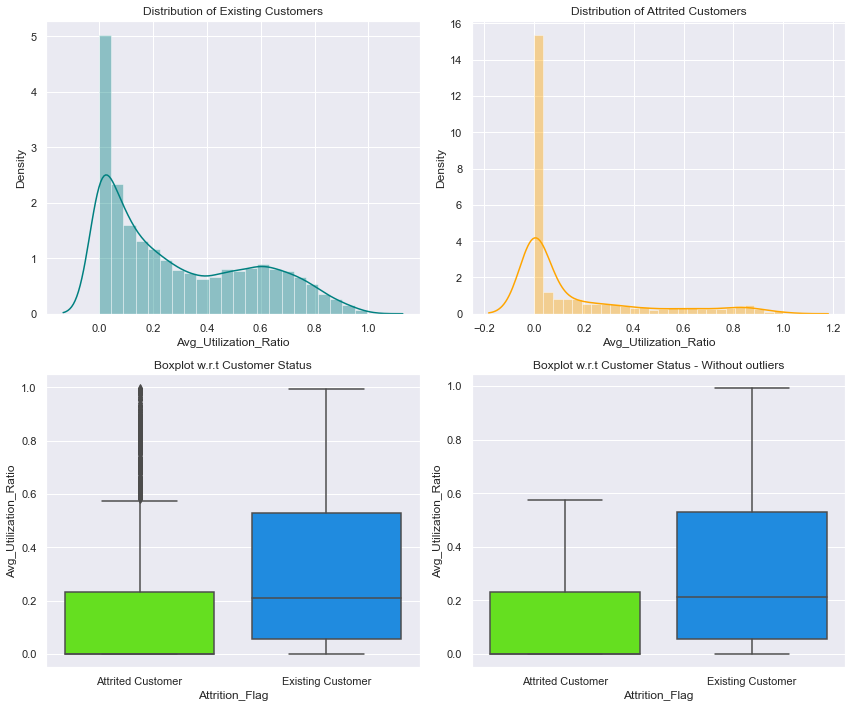

In [87]:
#Print count plot for each categorical column
for column in num_cols:
    print(column+':\n'+'*'*50)
    plot(column)
    print('\n'*2)

***
* *Attrited Customers may have a slightly higher `age`.*
* *`Months on book` doesn't seem to have much of an effect on attrition rate.*
* *Those with fewer bank products seem to have a higher attrition rate.*
* *Number of times a customer is contacted by the bank does not seem to have much of an effect on attrition rates.*
* *Existing customers may have higher `credit limits` than attrited customers.*
* *Existing customers may have a higher `revolving balance` than attrited customers.* 
* *`Average open-to-buy` values do not seem to effect attrition rates significantly.*
* *Existing customers tend to have a higher `transaction amount` than attrited customers.*
* *Existing customers tend to have a higher `total number of transactions` than attrited customers.*
* *Existing customers tend to have a greater increase in `total number of transactions between Q1 and Q4` than attrited customers.*
* *Existing customers tend to have a higher `utilizatoin ratio` than attrited customers.*
***

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Initial_Insights'></a>
## Initial Insights

* Credit Limit and Open-to-Buy values have a perfect correlation. Because open-to-buy values seem to have less of an effect on attrition rates I will drop that column.
* Credit Limit and number of bank products along with the number and amount of transactions may have biggest impacts on attrition rates.
* Revolving Balance and and utilization ratios are highly correlated, but they both may impact the attrition rates, so I will keep those columns in.

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Data_Pre-Processing'></a>
# (3) Data Pre-Processing

In [94]:
#Convert divorced observations to single.
df["Marital_Status"] = df["Marital_Status"].replace("Divorced", "Single")

In [95]:
#Check Marital Status counts
df['Marital_Status'].value_counts()

Single     4691
Married    4687
Unknown     749
Name: Marital_Status, dtype: int64

In [96]:
#Drop open-to-buy column.
df.drop(['Avg_Open_To_Buy'],axis=1,inplace=True)
print(f'There are now {df.shape[0]} rows and {df.shape[1]} columns.')
df.head()

There are now 10127 rows and 19 columns.


Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
0       12691.0                  777                 1.335             1144   
1        8256.0                  864                 1.541             1291   
2        3418.0                    0                 2.594             1887   
3        3313.0                 2517                 1.405             1171   
4        4716.0                    0                 2.175              816   

   Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0              42                1.625                  0.061  
1              33                3.714                  0.105  
2              20                2.333                  0.000  
3              20                2.333                  0.760  
4              28                2.500                  0.000

## Outlier Treatment

* The following columns exhibited several outliers or significant skewedness:
    * Credit_Limit
    * Total_Ct_Chng_Q4_Q1
    * Total_Amt_Chng_Q4_Q1
    * Total_Trans_Ct
    * Total_Trans_Amt
* The outliers may reflect natural observations as there can be great variability for the financial status of bank customers.

In [100]:
#Checking observation with the highest credit limit
cl = df[df.Credit_Limit == 34516] #Max value of Credit Limit is $34516
print(cl.shape)

(508, 19)


***
* *There are 508 observations with the same credit limit. This is either a entry error or $34,516 is the max credit limit that Thera Bank offers. I think the latter is more likely, so I will leave these values alone.*
***

## Split the data into train, validation and test sets 

In [195]:
# Separating target variable and other variables
X = df.drop(columns='Attrition_Flag')
Y = df['Attrition_Flag']

In [196]:
#Convert divorced observations to single.
Y = Y.replace("Attrited Customer", 1)
Y = Y.replace("Existing Customer", 0)

In [197]:
#Confirm attrition ratio is correct
print(Y.value_counts())#print encoded values
print('\n\n')
print(df["Attrition_Flag"].value_counts()) #print original values

0    8500
1    1627
Name: Attrition_Flag, dtype: int64



Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


In [198]:
# Splitting the data into train, validation and test sets
x_train, X_test, y_train, Y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1, stratify=Y)

X_train, X_val, Y_train, Y_val = train_test_split(
    x_train, y_train, test_size=0.25, random_state=1, stratify=y_train)

print('X_train:',X_train.shape,'X_val:',X_val.shape,'X_test:',X_test.shape)

X_train: (6075, 18) X_val: (2026, 18) X_test: (2026, 18)


## Encoding categorical varaibles

In [199]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_val=pd.get_dummies(X_val,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print('X_train:',X_train.shape,'X_val:',X_val.shape,'X_test:',X_test.shape)

X_train: (6075, 30) X_val: (2026, 30) X_test: (2026, 30)


***
* After encoding there are 30 columns.
***

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Model_Evaluation_Criterion'></a>
# (4) Model Evaluation Criterion

**Model can make wrong predictions as:**
1. Predicting a customer will cancel their credit card service, but the customer remains a credit card customer. (False Positive)
    - Loss of Resources by making efforts to hold on to a customer that would have stayed anyways. 
2. Predicting a customer will keep their credict card service, but the customer cancels their credit card service instead. (False Negative)
    - Loss of opportunity by failing to make an effort to keep the customer and losing their revenue as a result.

**Which case is more important?** 
* The second case (False Negatives) is more important, because it has the potential to result in a loss of revenue which is more detrimental to the business than wasting resources.

**How to reduce False Negatives?**
* The bank should maximize Recall which decreases the chance false negatives as it increases.

In [208]:
##  Function to calculate different metric scores of the model  - Accuracy, Recall and Precision
## Comparing Training and Test Data
def get_metrics_score_test(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend(
        (
            train_acc,test_acc,train_recall,test_recall,train_precision,test_precision
        )
    )
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [213]:
##  Function to calculate different metric scores of the model  - Accuracy, Recall and Precision
## Comparing Training and Validation Data
def get_metrics_score_val(model,train,val,train_y,val_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_val = model.predict(val)
    
    train_acc = model.score(train,train_y)
    val_acc = model.score(val,val_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    val_recall = metrics.recall_score(val_y,pred_val)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    val_precision = metrics.precision_score(val_y,pred_val)
    
    score_list.extend(
        (
            train_acc,val_acc,train_recall,val_recall,train_precision,val_precision
        )
    )
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on validtion set : ",model.score(val,val_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on validation set : ",metrics.recall_score(val_y,pred_val))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on validation set : ",metrics.precision_score(val_y,pred_val))
    
    return score_list # returning the list with train and test scores

In [210]:
def make_confusion_matrix_test(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Remained","Actual - Canceled"]],
                  columns = [i for i in ['Predicted - Remained','Predicted - Canceled']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [211]:
def make_confusion_matrix_val(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_val)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - Remained","Actual - Canceled"]],
                  columns = [i for i in ['Predicted - Remained','Predicted - Canceled']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Logistic_Regression_Model'></a>
# (5) Logistic Regression Model

<a id='Original_Data'></a>
## LR Original Data

In [200]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,Y_train)

LogisticRegression(random_state=1)

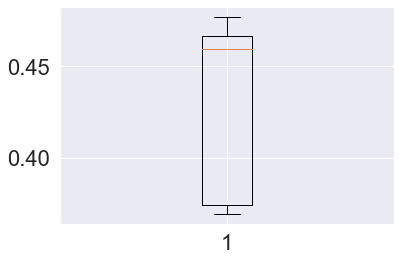

In [201]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=Y_train, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

***
* *Recall varies from .35 to .50*
* *The average recall is above .45*

Accuracy on training set :  0.8869135802469136
Accuracy on validtion set :  0.8953603158933859
Recall on training set :  0.49077868852459017
Recall on validation set :  0.5460122699386503
Precision on training set :  0.7159940209267563
Precision on validation set :  0.7355371900826446


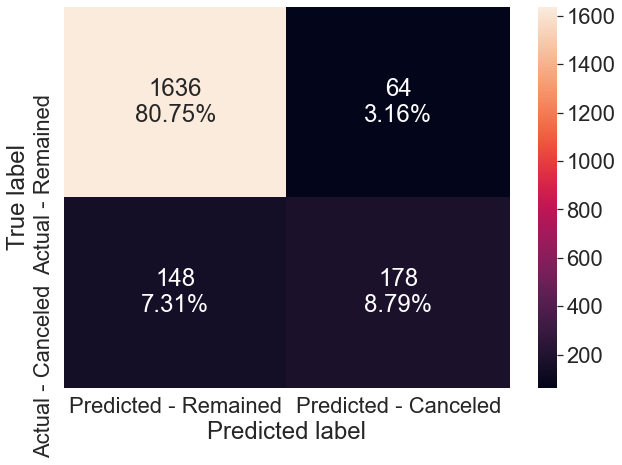

In [214]:
#Calculating different metrics
scores_LR = get_metrics_score_val(lr,X_train,X_val,Y_train,Y_val)

# creating confusion matrix
make_confusion_matrix_val(lr,Y_val)

***
* *Recall is low, but all metrics improve when the model is tested on the validation set indicating the model is not overfitting, so regularization is not needed.*
***

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Up_Sampled_Data'></a>
## LR Up Sampled Data

In [218]:
# Import modules to perform oversampling
from imblearn.over_sampling import SMOTE

In [220]:
print("Before UpSampling, counts of label 'Canceled': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'Remained': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, Y_train_over = sm.fit_resample(X_train, Y_train)


print("After UpSampling, counts of label 'Canceled': {}".format(sum(Y_train_over==1)))
print("After UpSampling, counts of label 'Remained': {} \n".format(sum(Y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(Y_train_over.shape))

Before UpSampling, counts of label 'Canceled': 1302
Before UpSampling, counts of label 'Remained': 6799 

After UpSampling, counts of label 'Canceled': 5099
After UpSampling, counts of label 'Remained': 5099 

After UpSampling, the shape of train_X: (10198, 30)
After UpSampling, the shape of train_y: (10198,) 



***
* *Up sampling did not remove too much information.*
***

In [221]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model on oversampled training set 
log_reg_over.fit(X_train_over,Y_train_over)

LogisticRegression(random_state=1)

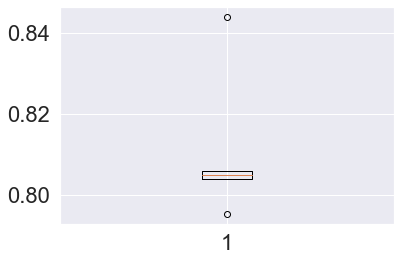

In [223]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=Y_train_over, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

***
* *Recall varies from .78 to .86.*
* *Much better performance than without oversampline.*
***

Accuracy on training set :  0.8216316924887233
Accuracy on validtion set :  0.8257650542941757
Recall on training set :  0.8209452833888998
Recall on validation set :  0.8128834355828221
Precision on training set :  0.8220738413197172
Precision on validation set :  0.4757630161579892


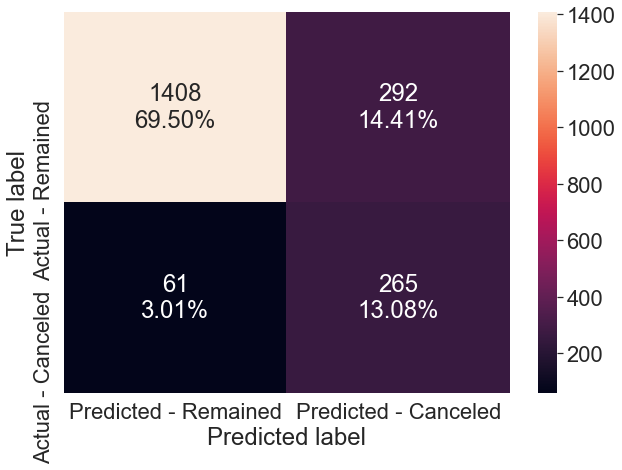

In [224]:
#Calculating different metrics for oversampled data
get_metrics_score_val(log_reg_over,X_train_over,X_val,Y_train_over,Y_val)

# creating confusion matrix for oversampled data
make_confusion_matrix_val(log_reg_over,Y_val)

***
* *Accuracy and Recall are similar in the training and validation set.*
* *Precision is much worse in validation set. The model may be overfitting, but since we are mainly concerned with Recall I don't think regularization is needed.*
***

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Down_Sampled_Data'></a>
## LR Down Sampled Data

In [225]:
# Import modules to perform undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, Y_train)

In [226]:
print("Before Under Sampling, counts of label 'Canceled': {}".format(sum(Y_train==1)))
print("Before Under Sampling, counts of label 'Remained': {} \n".format(sum(Y_train==0)))

print("After Under Sampling, counts of label 'Canceled': {}".format(sum(y_train_un==1)))
print("After Under Sampling, counts of label 'Remained': {} \n".format(sum(y_train_un==0)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Canceled': 976
Before Under Sampling, counts of label 'Remained': 5099 

After Under Sampling, counts of label 'Canceled': 976
After Under Sampling, counts of label 'Remained': 976 

After Under Sampling, the shape of train_X: (1952, 30)
After Under Sampling, the shape of train_y: (1952,) 



In [227]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

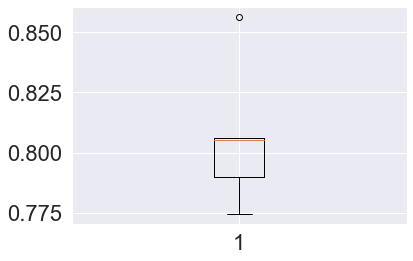

In [228]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

***
* *Recall varies from .78 to .855.*
* *More variance than oversampling.*
***

Accuracy on training set :  0.8135245901639344
Accuracy on test set :  0.8198420533070089
Recall on training set :  0.8125
Recall on test set :  0.8128834355828221
Precision on training set :  0.8141683778234087
Precision on test set :  0.46572934973637964


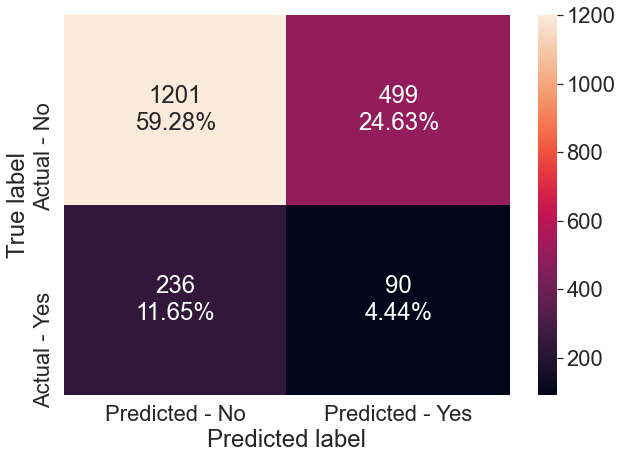

In [230]:
#Calculating different metrics
get_metrics_score_val(log_reg_under,X_train_un,X_val,y_train_un,Y_val)


# creating confusion matrix
make_confusion_matrix_val(log_reg_under,Y_val)

***
* *Accuracy and Recall are similar in the training and validation set.*
* *Precision is much worse in validation set. The model may be overfitting, but since we are mainly concerned with Recall I don't think regularization is needed.*
***

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Regularization'></a>
## Regularization

* Regularization was not needed for these models as the model was not overfitting when it pertained to recall measurements.

<a id='Compare_LR_Models'></a>
## Compare LR Models on Test Data

In [284]:
# defining list of model
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score_test(model,X_train,X_test,Y_train,Y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [285]:
# defining list of models
models = [log_reg_over]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score_test(model,X_train_over,X_test,Y_train_over,Y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [286]:
# defining list of model
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score_test(model,X_train_un,X_test,y_train_un,Y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [287]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression','Logistic Regression on Oversampled data',
                                          'Logistic Regression on Undersampled data'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
2  Logistic Regression on Undersampled data        0.813525       0.814413   
1   Logistic Regression on Oversampled data        0.821632       0.808983   
0                       Logistic Regression        0.886914       0.889931   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
2      0.812500     0.827692         0.814168        0.456706  
1      0.820945     0.824615         0.822074        0.448161  
0      0.490779     0.498462         0.715994        0.729730

***
* *Logistic Regression on Undersampled Data performed the best on Recall.*
***

In [312]:
# Create date frame to find coefficients on best model
log_odds = log_reg_under.coef_[0]
coef_df = pd.DataFrame(log_odds, X_train_un.columns, columns=['coef'])

In [313]:
# Create date frame to convert coefficients to odds
odds = np.exp(np.abs(log_reg_under.coef_[0]))-1
pd.set_option('display.max_rows',None)
odds_df = pd.DataFrame(odds, X_train_un.columns, columns=['Change in odds'])

In [315]:
coef_df['Change in Odds'] = odds_df['Change in odds']

In [316]:
coef_df

coef  Change in Odds
Customer_Age                    0.047794        0.048955
Dependent_count                 0.451703        0.570985
Months_on_book                 -0.009524        0.009570
Total_Relationship_Count       -0.129131        0.137839
Months_Inactive_12_mon          0.457890        0.580736
Contacts_Count_12_mon           0.639761        0.896027
Credit_Limit                    0.000006        0.000006
Total_Revolving_Bal            -0.000837        0.000838
Total_Amt_Chng_Q4_Q1            0.001148        0.001149
Total_Trans_Amt                 0.000508        0.000508
Total_Trans_Ct                 -0.120864        0.128472
Total_Ct_Chng_Q4_Q1            -0.074770        0.077636
Avg_Utilization_Ratio           0.019664        0.019858
Gender_M                       -0.064805        0.066951
Education_Level_Doctorate       0.007494        0.007522
Education_Level_Graduate        0.038354        0.039099
Education_Level_High School    -0.011559        0.011626
Education_Level_Post-Graduate   0.019717        0.019913
Education_Level_Uneducated      0.000720        0.000720
Education_Level_Unknown         0.014525        0.014631
Marital_Status_Single           0.081267        0.084660
Marital_Status_Unknown          0.030174        0.030634
Income_Category_$40K - $60K     0.020079        0.020282
Income_Category_$60K - $80K    -0.034821        0.035435
Income_Category_$80K - $120K    0.009576        0.009622
Income_Category_Less than $40K  0.102221        0.107628
Income_Category_Unknown         0.006262        0.006281
Card_Category_Gold              0.009032        0.009073
Card_Category_Platinum          0.003048        0.003053
Card_Category_Silver            0.010074        0.010125

***
* Strongest Correlations:
    * `Dependent_count`: For each additional dependent the odds that a customer will cancel they're credit card increases by 57%.
    * `Total_Relationship_Count`: For each bank product a customer has the odds the customer will cancel their credit card decreases by 14%.
    * `Months_Inactive_12_mon`: For each additional month a customers credit account is inactive teh odds the customer will cancel their credit card increases by 45%
    * `Contacts_Count_12_mon`: With each additional contact a customer recieves from the bank the odds the customer will cancel their credit card increase by 89%
    * `Income_Category_Less than $40K`: The odds of a customer who earns less than $40K a year canceling their credit card are 11% higher than the odds that someone who earns over $120K will cancel their credit card.
***

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Bagging_and_Boosting_Models'></a>
# (6) Bagging and Boosting Models

<a id='Cross_Validation_Scores'></a>
## Cross Validation Scores

In [247]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list

models.append(
    (
        "Classifier",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("bagging_classifier", BaggingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=Y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

Classifier: 78.58451072736786
RF: 74.79330193615908
GBM: 81.65567765567765
ADB: 81.75719518576662
XGB: 86.36891679748823
DTREE: 78.27891156462586


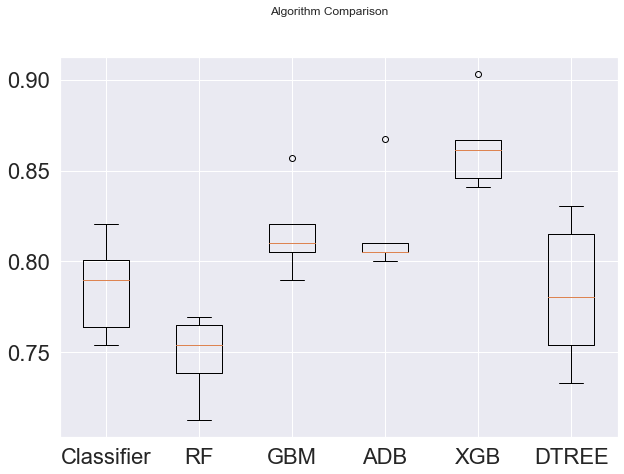

In [248]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

***
* *The three models with the highest average cross validation scores are the following:*
    * (1) *XGBoost at 86.37*
    * (2) *AdaBoosting at 81.76*
    * (3) *Gradient Boosting at 81.65*
* *These models were also the most consistent with the least amount of variation between cross validation scores.*
***

<a id='Grid_Search'></a>
# (8) Grid Search Hyperparameter Tuning

<a id='XGBoostGS'></a>
## XGBoost

In [302]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,Y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))

Best parameters are {'xgbclassifier__gamma': 5, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.8} with CV score=0.9446520146520146:
CPU times: user 6h 17min 50s, sys: 2min 47s, total: 6h 20min 37s
Wall time: 1h 53min 20s


In [305]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=200,
        scale_pos_weight=10,
        subsample=0.8,
        learning_rate=0.01,
        gamma=5,
        eval_metric='logloss',
    ),
)

# Fit the model on training data
xgb_tuned1.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9437037037037037
Accuracy on validtion set :  0.9299111549851925
Recall on training set :  0.9979508196721312
Recall on validation set :  0.9631901840490797
Precision on training set :  0.741248097412481
Precision on validation set :  0.7072072072072072


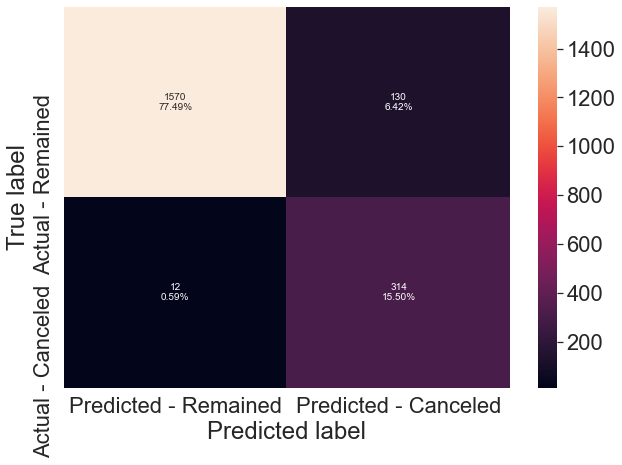

In [306]:
# Calculating different metrics
get_metrics_score_val(xgb_tuned1,X_train,X_val,Y_train,Y_val)

# Creating confusion matrix
make_confusion_matrix_val(xgb_tuned1, Y_val)

***
* *XGBoost GridSearch took almost two hours compared to just a few minutes for XGBoost RandomSearch.*
* *Recall increased to .99 from .863 in cross validation.*
* *There is only a slight reduction in performance on the validation set. This model may generalize well.*
***

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='AdaBoostGS'></a>
## AdaBoost

In [293]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, Y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 60} 
Score: 0.8534484563055992
CPU times: user 6min 10s, sys: 3.23 s, total: 6min 13s
Wall time: 6min 20s


In [294]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1),
        n_estimators=60,
        learning_rate=1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned1.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=60,
                                    random_state=1))])

Accuracy on training set :  0.985679012345679
Accuracy on validtion set :  0.9659427443237907
Recall on training set :  0.9456967213114754
Recall on validation set :  0.8650306748466258
Precision on training set :  0.9644723092998955
Precision on validation set :  0.9185667752442996


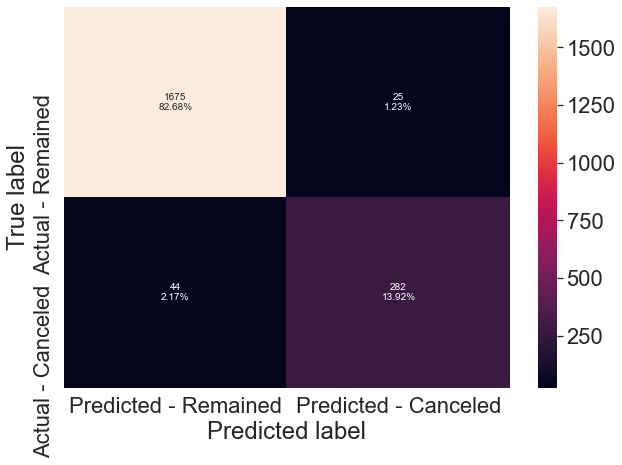

In [296]:
# Calculating different metrics
get_metrics_score_val(abc_tuned1,X_train,X_val,Y_train,Y_val)

# Creating confusion matrix
make_confusion_matrix_val(abc_tuned1, Y_val)

***
* *AdaBoost GridSearch took about 6 minutes compared to 2 minutes for RandomSearch.*
* *Recall increased from .8176 in cross validation to .94 in AdaBoost.*
* *There is a reduction in performance on the Validation set to .86. This model may not generalize the best.*
***

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Gradient_BoostGS'></a>
## Gradient Boosting

In [298]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {"gradientboostingclassifier__n_estimators": [100,150,200,250],
              "gradientboostingclassifier__subsample":[0.8,0.9,1],
              "gradientboostingclassifier__max_features":[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, Y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'gradientboostingclassifier__max_features': 0.8, 'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__subsample': 0.8} 
Score: 0.8616640502354789
CPU times: user 4min 31s, sys: 2.17 s, total: 4min 33s
Wall time: 4min 42s


In [299]:
# Creating new pipeline with best parameters
gbm_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        subsample = .8,
        n_estimators = 250,
        max_features = .8,
        random_state=1
    )
)

# Fit the model on training data
gbm_tuned1.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_features=0.8, n_estimators=250,
                                            random_state=1, subsample=0.8))])

Accuracy on training set :  0.9894650205761317
Accuracy on validtion set :  0.9748272458045409
Recall on training set :  0.9508196721311475
Recall on validation set :  0.9049079754601227
Precision on training set :  0.9830508474576272
Precision on validation set :  0.9365079365079365


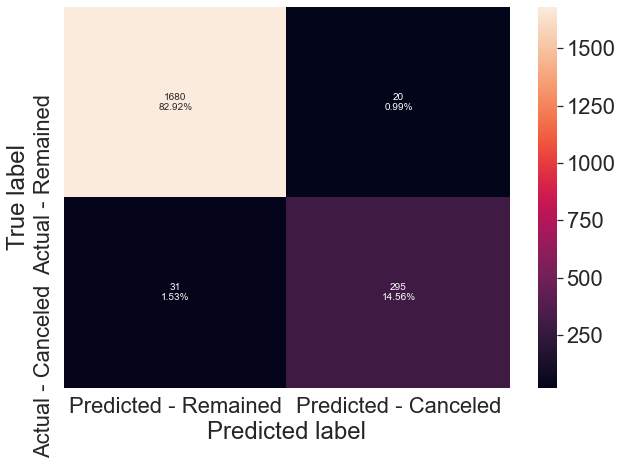

In [300]:
# Calculating different metrics
get_metrics_score_val(gbm_tuned1,X_train,X_val,Y_train,Y_val)

# Creating confusion matrix
make_confusion_matrix_val(gbm_tuned1, Y_val)

***
* *Gradient Boosting took about the same amount of time for both GridSearch and RandomSearch around 4 minutes.*
* *Recall for GridSearch increased from .8165 in cross validation to .9508.*
* *There is a small reduction in performance on the Validation set to .90. This model may generalize well enough.*
***

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Random_Search'></a>
# (8) Random Search Hyperparameter Tuning

<a id='XGBoostRS'></a>
## XGBoost

In [249]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}





# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,Y_train)

print("Best parameters are {} with .
      CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.8, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__reg_lambda': 10, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__max_depth': 2, 'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__gamma': 5} with CV score=0.9651543694400836:
CPU times: user 9min 36s, sys: 3.59 s, total: 9min 39s
Wall time: 2min 41s


In [266]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=100,
                scale_pos_weight=10,
                gamma=5,
                subsample=0.8,
                learning_rate= 0.2,
                eval_metric='logloss', max_depth = 2, reg_lambda = 10
            ),
        ),
    ]
)
# Fit the model on validation data
xgb_tuned2.fit(X_train, Y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.2,
                               max_delta_step=0, max_depth=2,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=10, scale_pos_weight=10,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.931358024691358
Accuracy on validtion set :  0.9284304047384008
Recall on training set :  0.9836065573770492
Recall on validation set :  0.9877300613496932
Precision on training set :  0.7053637031594416
Precision on validation set :  0.6954643628509719


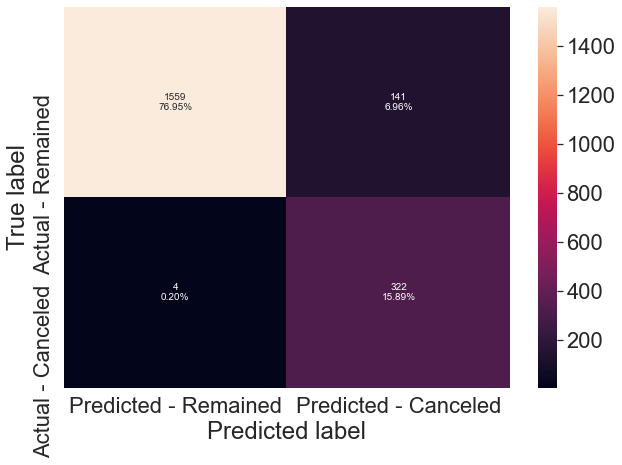

In [267]:
# Calculating different metrics
get_metrics_score_val(xgb_tuned2,X_train,X_val,Y_train,Y_val)

# Creating confusion matrix
make_confusion_matrix_val(xgb_tuned2, Y_val)

***
* *XGBoost RandomSearch greatly reduced the amount of time from XGBoost GridSearch.*
* *Recall increased to .983 from .863 in cross validation. Although this is a decrease from the GridSearch*
* *This model performs slightly better on the validation set at.987 . This model will generalize well.*
***

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='AdaBoostRS'></a>
## AdaBoost

In [261]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
    "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "adaboostclassifier__base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
abc_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
abc_tuned2.fit(X_train,Y_train)

print("Best parameters are {} with CV score={}:" .format(abc_tuned2.best_params_,abc_tuned2.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 0.1, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8514338042909472:
CPU times: user 2min 10s, sys: 1.18 s, total: 2min 11s
Wall time: 2min 13s


In [270]:
# Creating new pipeline with best parameters
abc_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
        n_estimators=90,
        learning_rate=0.1,
        random_state=1,
    ),
)

# Fit the model on training data
abc_tuned2.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=0.1, n_estimators=90,
                                    random_state=1))])

Accuracy on training set :  0.980246913580247
Accuracy on validtion set :  0.9708785784797631
Recall on training set :  0.9139344262295082
Recall on validation set :  0.8680981595092024
Precision on training set :  0.9612068965517241
Precision on validation set :  0.9464882943143813


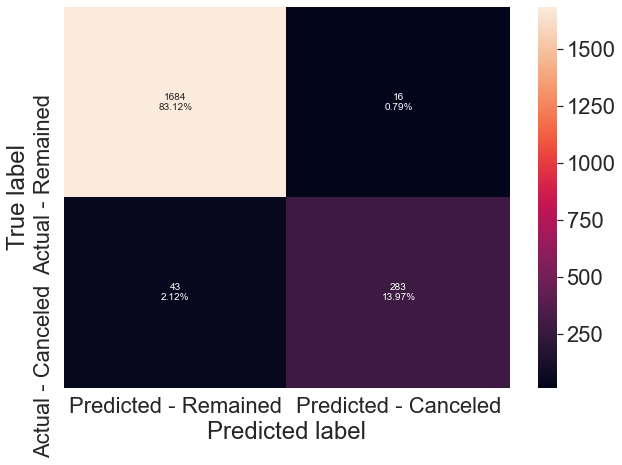

In [272]:
# Calculating different metrics
get_metrics_score_val(abc_tuned2,X_train,X_val,Y_train,Y_val)

# Creating confusion matrix
make_confusion_matrix_val(abc_tuned2, Y_val)

***
* *AdaBoost RandomSearch took a few minutes less than GridSearch.*
* *Recall increased from .8176 in cross validation to .91 in AdaBoost. Although this a slight decrease from the GridSearch validation*
* *There is a small reduction in performance on the Validation set to .86. This model may generalize well enough.*
***

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Gradient_BoostRS'></a>
## Gradient Boosting

In [277]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {"gradientboostingclassifier__n_estimators": [100,150,200,250],
              "gradientboostingclassifier__subsample":[0.8,0.9,1],
              "gradientboostingclassifier__max_features":[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gbm_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
gbm_tuned2.fit(X_train,Y_train)

print("Best parameters are {} with CV score={}:" .format(gbm_tuned2.best_params_,gbm_tuned2.best_score_))

Best parameters are {'gradientboostingclassifier__subsample': 0.8, 'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__max_features': 0.8} with CV score=0.8616640502354789:
CPU times: user 4min 25s, sys: 1.57 s, total: 4min 27s
Wall time: 4min 30s


In [278]:
# Creating new pipeline with best parameters
gbm_tuned2 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        subsample = .8,
        n_estimators = 250,
        max_features = .8,
        random_state=1
    )
)

# Fit the model on training data
gbm_tuned2.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_features=0.8, n_estimators=250,
                                            random_state=1, subsample=0.8))])

Accuracy on training set :  0.9894650205761317
Accuracy on validtion set :  0.9748272458045409
Recall on training set :  0.9508196721311475
Recall on validation set :  0.9049079754601227
Precision on training set :  0.9830508474576272
Precision on validation set :  0.9365079365079365


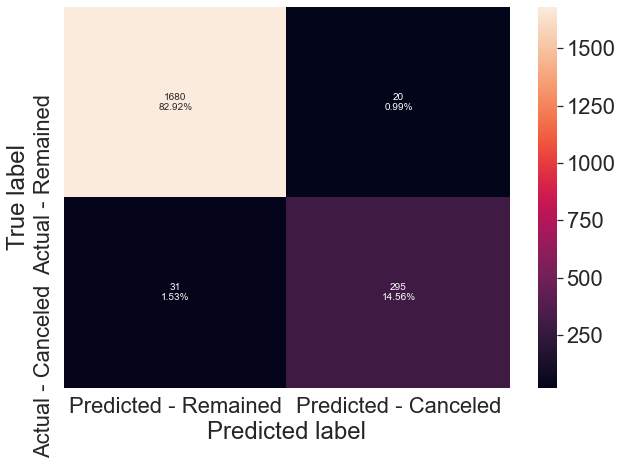

In [279]:
# Calculating different metrics
get_metrics_score_val(gbm_tuned2,X_train,X_val,Y_train,Y_val)

# Creating confusion matrix
make_confusion_matrix_val(gbm_tuned2, Y_val)

***
* *Gradient Boosting took about the same amount of time for both GridSearch and RandomSearch around 4 minutes.*
* *Recall for RandomSearch increased from .8165 in cross validation to .9508. The GridSearch and RandomSearch models improve about the same.*
* *There is a small reduction in performance on the Validation set to .90. This model may generalize well enough.*
***

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Model_Performances'></a>
# (9) Model Performances after Hyperparameter Tuning

In [308]:
# defining list of models
models = [abc_tuned1, abc_tuned2, xgb_tuned1, xgb_tuned2, gbm_tuned1, gbm_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
# loop through test values
for model in models:

    j = get_metrics_score_test(model,X_train,X_test,Y_train,Y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [310]:
#Create DataFrame of Testing and Training model performances
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "AdaBoost with GridSearchCV",
            "AdaBoost with RandomSearchCV",
            "XGBoost with GridSearchCV",
            "XGBoost with RandomSearchCV",
            "Gradient Boost with GridSearchCV",
            "Gradient Boost with RandomSearchCV"    
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
3         XGBoost with RandomSearchCV        0.931358       0.937315   
2           XGBoost with GridSearchCV        0.943704       0.927937   
4    Gradient Boost with GridSearchCV        0.989465       0.979763   
5  Gradient Boost with RandomSearchCV        0.989465       0.979763   
0          AdaBoost with GridSearchCV        0.985679       0.974334   
1        AdaBoost with RandomSearchCV        0.980247       0.976308   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  
3      0.983607     0.984615         0.705364        0.723982  
2      0.997951     0.972308         0.741248        0.697572  
4      0.950820     0.926154         0.983051        0.946541  
5      0.950820     0.926154         0.983051        0.946541  
0      0.945697     0.913846         0.964472        0.925234  
1      0.913934     0.913846         0.961207        0.936909

***
* *XGBoost with RandomSearch performed the best on the test set.*
***

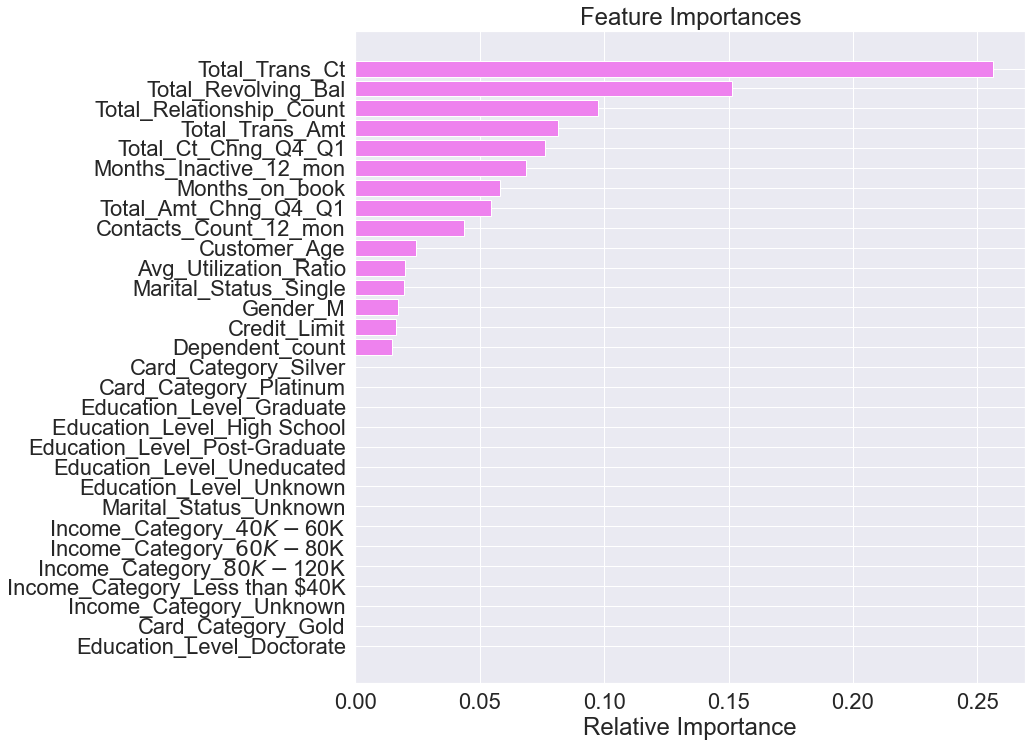

In [290]:
feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [317]:
coef_df

coef  Change in Odds
Customer_Age                    0.047794        0.048955
Dependent_count                 0.451703        0.570985
Months_on_book                 -0.009524        0.009570
Total_Relationship_Count       -0.129131        0.137839
Months_Inactive_12_mon          0.457890        0.580736
Contacts_Count_12_mon           0.639761        0.896027
Credit_Limit                    0.000006        0.000006
Total_Revolving_Bal            -0.000837        0.000838
Total_Amt_Chng_Q4_Q1            0.001148        0.001149
Total_Trans_Amt                 0.000508        0.000508
Total_Trans_Ct                 -0.120864        0.128472
Total_Ct_Chng_Q4_Q1            -0.074770        0.077636
Avg_Utilization_Ratio           0.019664        0.019858
Gender_M                       -0.064805        0.066951
Education_Level_Doctorate       0.007494        0.007522
Education_Level_Graduate        0.038354        0.039099
Education_Level_High School    -0.011559        0.011626
Education_Level_Post-Graduate   0.019717        0.019913
Education_Level_Uneducated      0.000720        0.000720
Education_Level_Unknown         0.014525        0.014631
Marital_Status_Single           0.081267        0.084660
Marital_Status_Unknown          0.030174        0.030634
Income_Category_$40K - $60K     0.020079        0.020282
Income_Category_$60K - $80K    -0.034821        0.035435
Income_Category_$80K - $120K    0.009576        0.009622
Income_Category_Less than $40K  0.102221        0.107628
Income_Category_Unknown         0.006262        0.006281
Card_Category_Gold              0.009032        0.009073
Card_Category_Platinum          0.003048        0.003053
Card_Category_Silver            0.010074        0.010125

***
* *Note: Interpretation of XGBoost can be difficult.*
* Top Ten Important Features Evaluated in connection with the best LR methods:
    * `Total_Trans_Ct`: As total number of transactions goes up, the likelyhood of cancelation decreases.
    * `Total_Revolving_Bal`: As the total revolving balance increases, the likelyhood of cancelation decreases.
    * `Total_Relationship_Count`: As the total number of bank products used by the customer increases, the likelyhood of cancellation decreases.
    * `Total_Trans_Amount`: As the total amount of a customer's transactions increases, the likelyhood of cancelation increases.
    * `Total_Ct_Chng_Q4_Q1`: As the change in total number of transactions goes up from Q4 to Q1, the likelyhood of cancelation decreases. 
    * `Months_Inactive_12_mon`: As the number of innactive months increases, the likelyhood of cancelation inreases.
    * `Months_on_Book`: As the length of customer retention increases, the likelyhood of cancelation decreases.
    * `Total_Amt_Chng_Q4_Q1`: As the change in amount of a customer's transactions goes up from Q4 to Q1, the likelyhood of cancelation increases.
    * `Contacts_Count_12_mon`: As the amount of times the bank contacts a customer increases, the likelyhood of cancellation increases.
    * `Customer_Age`: As a customer's age increases, the likelyhood of cancelation increases.
***

***
[[Table of Contents](#Table_of_Contents)]
***

<a id='Insights_and_Recommendations'></a>
# (10) Actionable Insights and Recommendations

* Customers who have more frequent inexpensive transactions tend to remain customers while customer with less frequent, but more expensive transactions tend to cancel their credit card.
* Customers with higher revolving balances tend to remain customers while customers with lower revolving balances tend to cancel. This is interesting since larger transaction amounts tend correlate to attrition. This indicates that for customer retention the value of a customers balance from month to month can be high, as long as the total amount that they spend is not also high.
* Customers who buy more bank products tend to remain credit card users compared to those with fewer bank products.
* Inactive customers are more likely to cancel than active customers.
* The longer a customer has been with the bank the more likely they are to remain a credit card user.

Based on the above notes and in order to minimize the amount of customers who will cancel after being predicted to remain a credit card user, it is recommended that the bank focus mainly on reaching out to customers who appear likely to remain in order to ensure their continued satisfaction with the bank–for example, customers who have frequent low cost transactions, have been with the bank for longer than three years, have a high revolving balance, and who purchase the most bank products. It may be easier to keep a satisfied customer happy than to sway an unsatisfied customer to stay.

The second focus for the bank can then be on minimizing attrition amongst customer most likely to cancel by offering incentives for low users to create more transactions, or establishing an incentive to carry over a balance from month to month.

***
[[Table of Contents](#Table_of_Contents)]
***